# RB
Here, we will analyze the RB position to identify any patterns in fantasy performance.

In [5]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# helper functions
import sys
sys.path.insert(0, os.path.abspath('../helper_files'))
from plotting import plot_mean_and_counts, plot_ranks_line, plot_ranks_boxplot

# display
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# global random_state
random_state = 9

In [8]:
# load data
rb = pd.read_csv('../data/final_data/rb.csv')

# view
print(f'The RB data has {rb.shape[0]} rows and {rb.shape[1]} columns:')
rb.head()

The RB data has 9321 rows and 157 columns:


,Player,Tm,Pos,Age,G,GS,Rush_Att,Rush_Yds,Rush_Y/A,Rush_TD,Rec_Tgt,Rec_Rec,Rec_Yds,Rec_Y/R,Rec_TD,Fmb,FmbLost,Key,Year,Scrim_Yds,Scrim_TD,num_games,games_played_pct,games_started_pct,ProBowl,AllPro,Exp,New_Team,Will_be_on_New_Team,Traded,Touches,Cmp%,Catch%,Rush_Att_per_game,Rush_Yds_per_game,Rush_TD_per_game,Rec_Tgt_per_game,Rec_Rec_per_game,Rec_Yds_per_game,Rec_TD_per_game,Fmb_per_game,FmbLost_per_game,Scrim_Yds_per_game,Scrim_TD_per_game,Touches_per_game,Points_standard,Points_half-ppr,Points_ppr,Points_6,PPG_standard,...,Rush_grades_offense,Rush_grades_run,Rush_longest,Rush_Team_Rush%,Rush_Avoided_tackles_per_attempt,Rush_10+_yard_run%,Rush_15+_yard_run%,Rush_15+_yard_run_yards%,Rush_First_down%,Rush_Gap%,Rush_Zone%,Rush_YCO_per_attempt,Receiving_avg_depth_of_target,Receiving_caught_percent,Receiving_contested_catch_rate,Receiving_drop_rate,Receiving_grades_hands_drop,Receiving_grades_pass_route,Receiving_inline_rate,Receiving_interceptions,Receiving_longest,Receiving_pass_block_rate,Receiving_route_rate,Receiving_slot_rate,Receiving_targeted_qb_rating,Receiving_wide_rate,Receiving_yards_after_catch_per_reception,Receiving_yards_per_reception,Receiving_yprr,Receiving_Avoided_tackles_per_reception,Receiving_First_down%,Receiving_Int_per_target,Receiving_YAC%,Team_Team Grade,Team_Offense Grade,Team_Passing Grade,Team_Pass Blocking Grade,Team_Receiving Grade,Team_Rushing Grade,Team_Run Blocking Grade,Team_Defense Grade,Team_Run Defense Grade,Team_Tackling Grade,Team_Pass Rush Grade,Team_Coverage Grade,Team_Special Teams Grade,Team_Wins,Team_Losses,Team_PPG,Team_PPG_allowed
0,Ron Johnson,NYG,RB,23,14,14,263,1027,3.904943,8,91.185521,48,487,10.145833,4,5.0,2.75,JohnRo02,1970,1514,12,16,0.8750,1.000000,True,True,1,False,False,False,311,0.0,0.526399,18.785714,73.357143,0.571429,6.513251,3.428571,34.785714,0.285714,0.357143,0.196429,108.142857,0.857143,22.214286,217.9,241.9,265.9,265.9,15.564286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dave Smith,SDG,RB,23,7,1,14,42,3.000000,0,7.598793,4,65,16.250000,0,0.0,0.00,SmitDa01,1970,107,0,16,0.4375,0.142857,False,False,1,False,False,False,18,0.0,0.526399,2.000000,6.000000,0.000000,1.085542,0.571429,9.285714,0.000000,0.000000,0.000000,15.285714,0.000000,2.571429,10.7,12.7,14.7,14.7,1.528571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nick Eddy,DET,RB,26,11,0,18,47,2.611111,1,7.598793,4,22,5.500000,0,2.0,1.10,EddyNi00,1970,69,1,16,0.6875,0.000000,False,False,4,False,False,False,22,0.0,0.526399,1.636364,4.272727,0.090909,0.690799,0.363636,2.000000,0.000000,0.181818,0.100000,6.272727,0.090909,2.000000,10.7,12.7,14.7,14.7,0.972727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Craig Baynham,CHI,RB,26,5,5,26,68,2.615385,0,22.796380,12,43,3.583333,0,0.0,0.00,BaynCr00,1970,111,0,16,0.3125,1.000000,False,False,4,False,False,False,38,0.0,0.526399,5.200000,13.600000,0.000000,4.559276,2.400000,8.600000,0.000000,0.000000,0.000000,22.200000,0.000000,7.600000,11.1,17.1,23.1,23.1,2.220000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chuck Mercein,NYJ,RB,27,9,0,20,44,2.200000,0,5.699095,3,27,9.000000,1,1.0,0.55,MercCh00,1970,71,1,16,0.5625,0.000000,False,False,5,False,False,False,23,0.0,0.526399,2.222222,4.888889,0.000000,0.633233,0.333333,3.000000,0.111111,0.111111,0.061111,7.888889,0.111111,2.555556,12.0,13.5,15.0,15.0,1.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

We'll restrict our analysis to only positive VORP players. These are the players you want on your team to place well in a fantasy football league. We will also be using PPR scoring in this entire notebook.

In [126]:
# player metadata cols
metadata_cols = ['Player', 'Year']

# stats cols
stats_cols = ['Age', 'Exp', 'games_played_pct', 'games_started_pct', 'Cmp%', 'Catch%'] + [col for col in rb.columns if 'Pass' in col or 'Rush' in col or 'Rec' in col or 'Scrim' in col or 'Fmb' in col or 'Touches' in col]
              
# flag cols
flag_cols = ['ProBowl', 'AllPro', 'Will_be_on_New_Team']

# PPR cols
ppr_cols = ['VORP_ppr_10tm'] + [col for col in rb.columns if 'ppr' in col and 'half' not in col and 'VORP' not in col]

In [127]:
# get top 25 RBs from each season (positive VORP RBs)
top_25 = rb.groupby('Year').apply(lambda x: x.nlargest(25, 'VORP_ppr_10tm')).reset_index(drop=True)

# top 10 (great RBs)
top_10 = rb.groupby('Year').apply(lambda x: x.nlargest(10, 'VORP_ppr_10tm')).reset_index(drop=True)

# top 3 (elite RBs)
top_3 = rb.groupby('Year').apply(lambda x: x.nlargest(3, 'VORP_ppr_10tm')).reset_index(drop=True)

# look at shapes
rb.shape, top_25.shape, top_10.shape, top_3.shape

((9297, 115), (1350, 115), (540, 115), (162, 115))

- The original dataset contained about 9k RB seasons. In most of these, the RB was not a viable fantasy option.
- The top_25 subset contains 1350 rows. Every RB season in this subset was at least replacement-level (25th ranked).
- The top_10 subset only contains 540 rows. These are top-10 (great) finishes.
- The top_3 subset contains 162 ELITE RB seasons.

## Point Dispersion
How are points distributed among the top 25 RBs season-by-season?

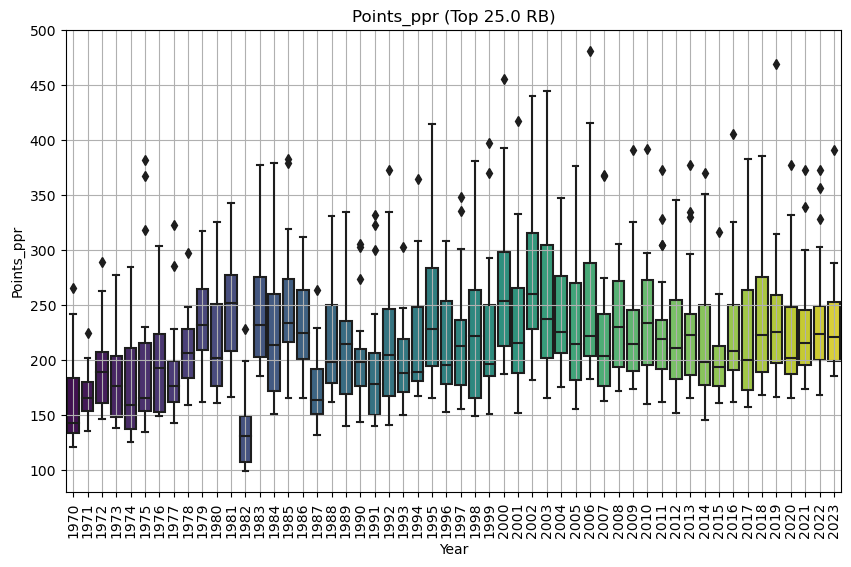

In [67]:
# boxplot of raw points (top 25)
plot_ranks_boxplot(top_25, 'Points_ppr')

- The highest value of each boxplot is the maximum fantasy points for that season: the best RB. If shown as a dot (outlier), than these RBs were significantly better than those who were ranked below.
- The top edge of each box is the 75th percentile, corresponding to the points of the 7th ranked RB for that season.
- The middle line in each box is the median, corresponding to the points of the 13th ranked RB for that season.
- The bottom edge of each box is the 25th percentile, corresponding to the points of the 19th ranked RB for that season.
- The bottom value is the points scored by the replacement-level (25th ranked) RB for that season.

The points spread of top-25 RBs has slightly increased since 1970.

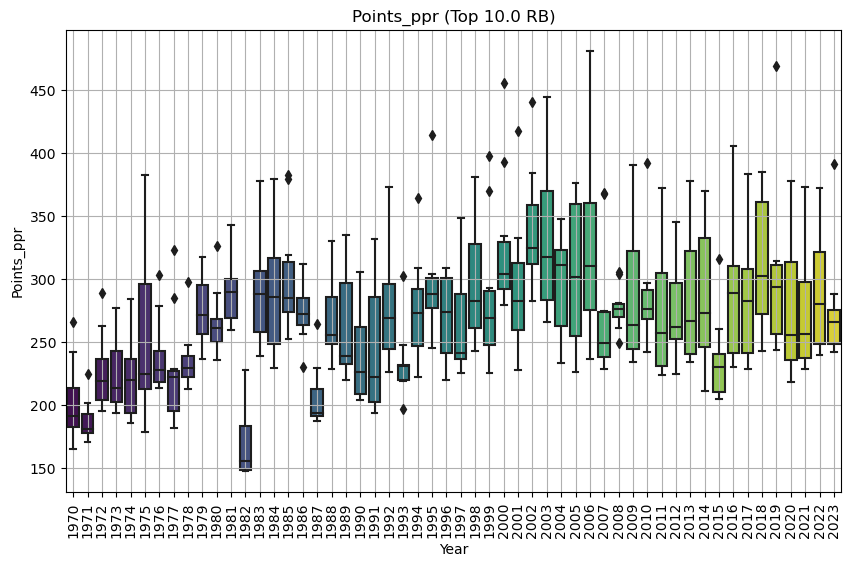

In [68]:
# boxplot of raw points (top 10)
plot_ranks_boxplot(top_10, 'Points_ppr')

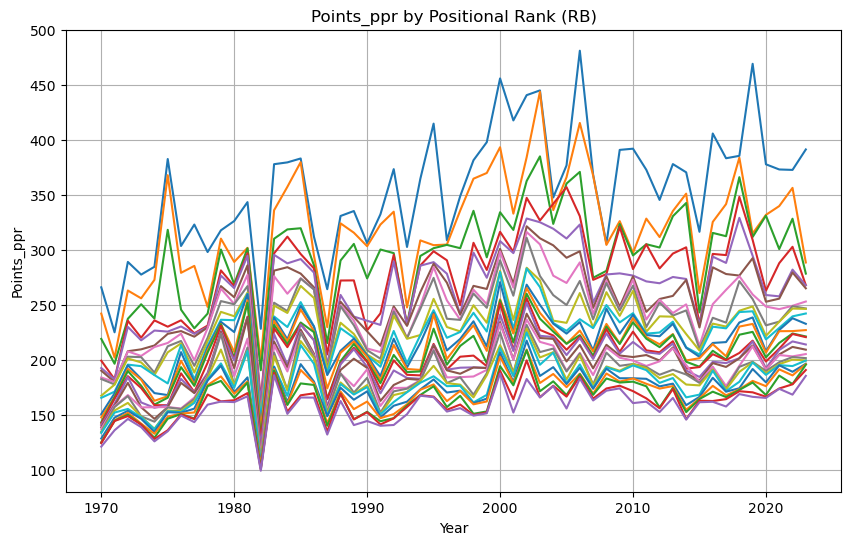

In [10]:
# lines of raw points (top 25)
plot_ranks_line(top_25, 'Points_ppr', legend=False)

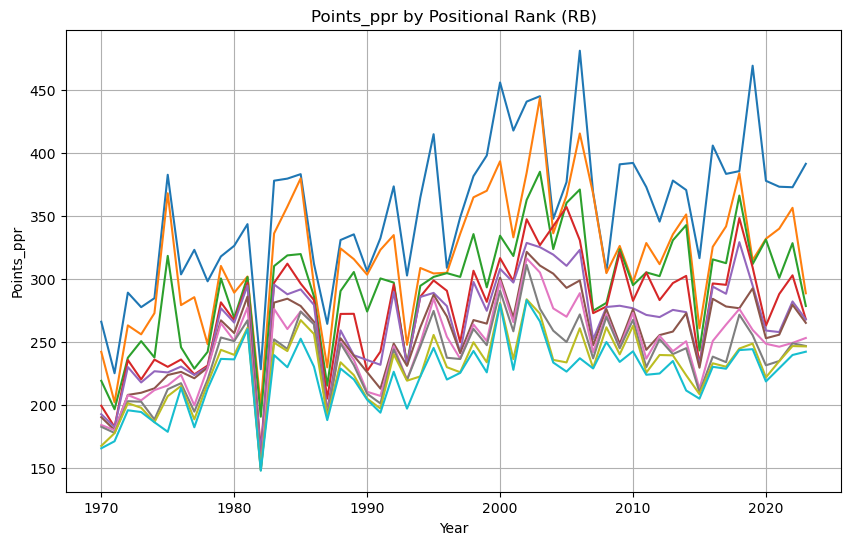

In [69]:
# lines of raw points (top 10)
plot_ranks_line(top_10, 'Points_ppr', legend=False)

- Points for the top 5-6 RBs increased noticebaly from 1970-2000, but have stayed pretty consistent since then. They have not increased even close to the rate that top-10 QB points have.
- Points for RBs ranked 7-25 have barely increased. This may be due to the "workhorse" RB being less favored in modern offenses (committees are much more commonplace).

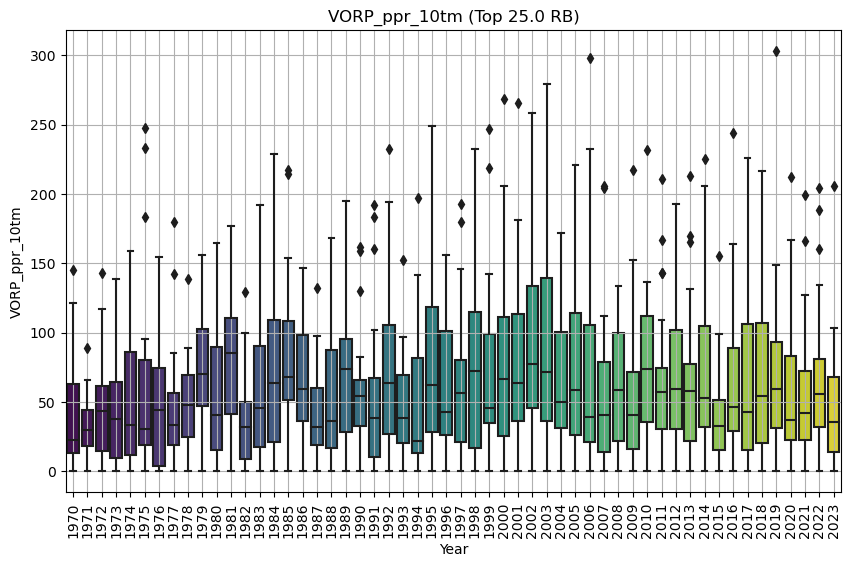

In [72]:
# boxplot of VORP (top 25)
plot_ranks_boxplot(top_25, 'VORP_ppr_10tm')

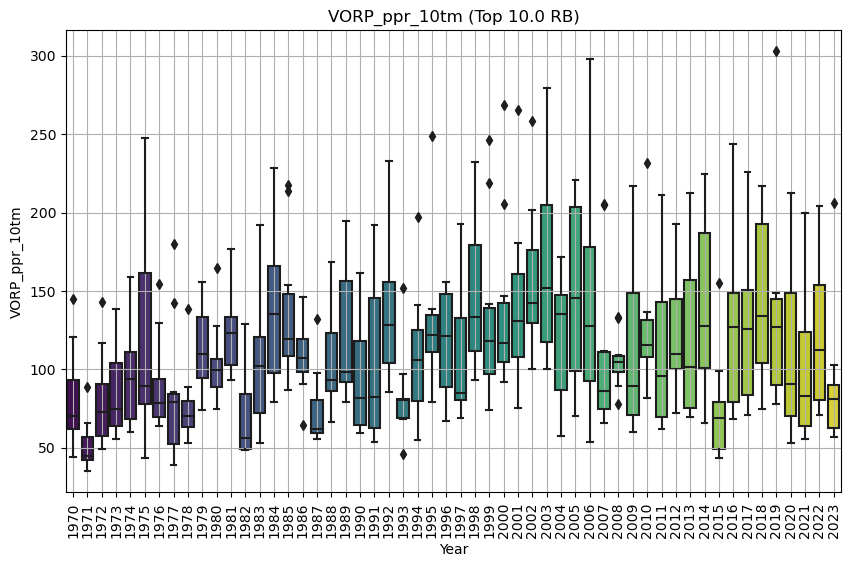

In [73]:
# boxplot of VORP (top 10)
plot_ranks_boxplot(top_10, 'VORP_ppr_10tm')

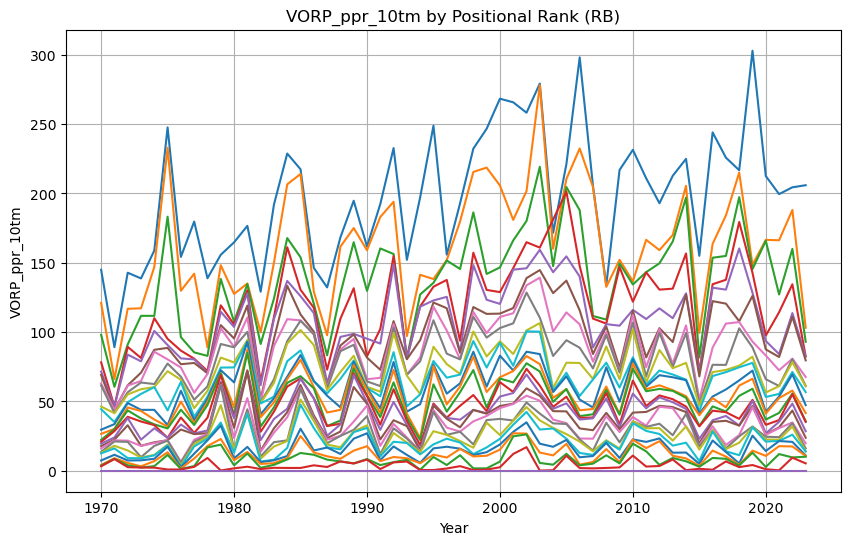

In [74]:
# plot lines of VORP (top 25)
plot_ranks_line(top_25, 'VORP_ppr_10tm', legend=False)

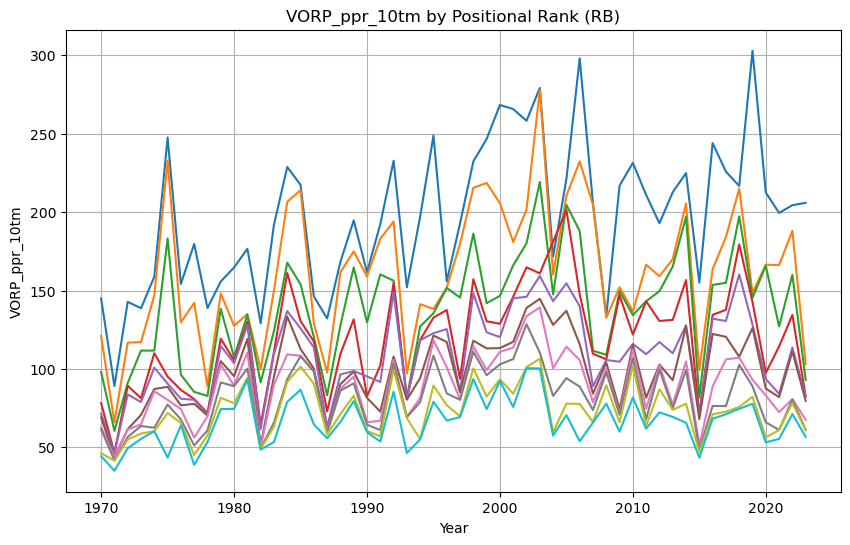

In [75]:
# plot lines of VORP (top 10)
plot_ranks_line(top_10, 'VORP_ppr_10tm', legend=False)

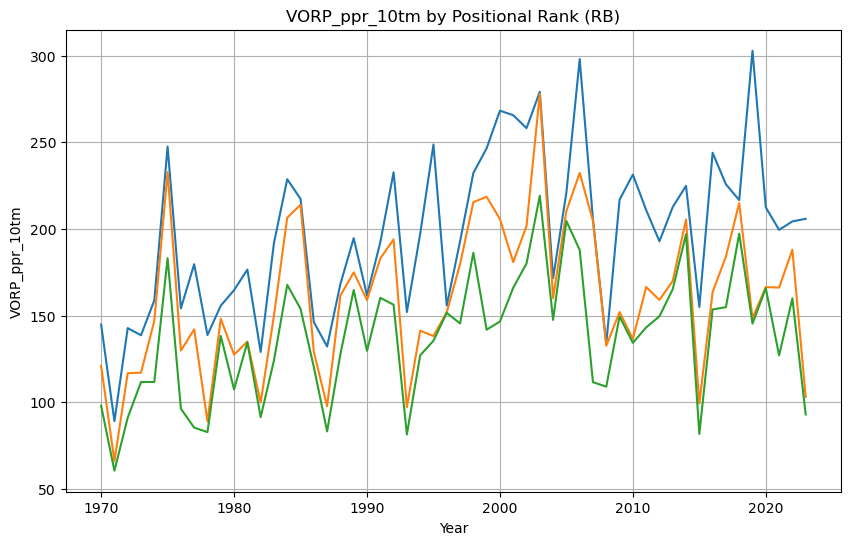

In [101]:
# plot lines of VORP (top 3)
plot_ranks_line(top_3, 'VORP_ppr_10tm', legend=False)

- Generally, the top 2-3 RBs are spaced above the rest.
- Since 2016, there has been a trend of the __top 2-4 RBs being in their own tier__.

In [41]:
# LaDainian Tomlinson, 2006
top_25[(top_25.Player == 'LaDainian Tomlinson') & (top_25.Year == 2006)][metadata_cols + ppr_cols]

,Player,Year,Age,Exp,G,GS,VORP_ppr_10tm,Points_ppr,PPG_ppr,PPT_ppr,SeasonOvrRank_ppr,SeasonPosRank_ppr,PPGOvrRank_ppr,PPGPosRank_ppr,PPTOvrRank_ppr,PPTPosRank_ppr,Target_ppr
18243,LaDainian Tomlinson,2006,27,5,16,16,298.1,481.1,30.06875,1.182064,1.0,1.0,1.0,1.0,308.0,50.0,367.58


In [42]:
# Christian McCaffrey, 2019
top_25[(top_25.Player == 'Christian McCaffrey') & (top_25.Year == 2019)][metadata_cols + ppr_cols]

,Player,Year,Age,Exp,G,GS,VORP_ppr_10tm,Points_ppr,PPG_ppr,PPT_ppr,SeasonOvrRank_ppr,SeasonPosRank_ppr,PPGOvrRank_ppr,PPGPosRank_ppr,PPTOvrRank_ppr,PPTPosRank_ppr,Target_ppr
25899,Christian McCaffrey,2019,23,2,16,16,302.9,469.2,29.325,1.158519,1.0,1.0,1.0,1.0,359.0,35.0,90.4


Above, we see that LT and CMC have the 2 most valuable RB fantasy seasons ever recorded.

In [110]:
# get counts for each RB
top3_count = top_3['Player'].value_counts()

# total amount of RBs who have finished top 5
len(set(top3_count.index))

83

Since 1970, there have been 83 different players who have finished as a top 3 fantasy RB.

In [111]:
# look at value counts where count is >= 4
top3_count[top3_count >= 4]

LaDainian Tomlinson    6
Walter Payton          6
Emmitt Smith           5
Barry Sanders          5
Thurman Thomas         5
Marshall Faulk         5
Christian McCaffrey    4
Lydell Mitchell        4
Name: Player, dtype: int64

Since 1970, there have been 8 RBs who have finished as a top 3 fantasy RB 4+ times. Other than LT (early 2000s), these RBs played in the 80s and 90s, when RB committees were much less common (giving them huge volume).

In [112]:
# get counts for each modern day RBs (post 2010)
top3_count_2010 = top_3[top_3['Year'] >= 2010]['Player'].value_counts()

# total amount of RBs who have finished top 5
len(set(top3_count_2010.index))

27

From 2010-2023 (14 seasons), there have been 27 different players who have finished as a top 3 fantasy RB.

In [113]:
# look where count is >= 3
top3_count_2010[top3_count_2010 >= 3]

Christian McCaffrey    4
Arian Foster           3
Le'Veon Bell           3
LeSean McCoy           3
Name: Player, dtype: int64

Since 2010, there have been 4 RBs who have finished as a top 3 fantasy RB 3+ times.

## Age

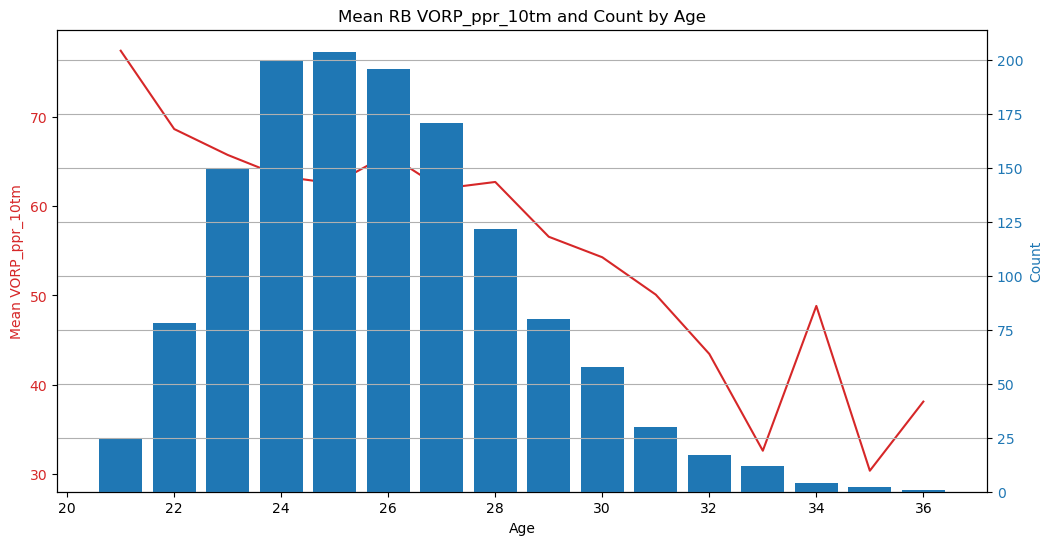

In [115]:
# plot mean VORP over Age (top 25)
plot_mean_and_counts(top_25, x='Age', y='VORP_ppr_10tm')

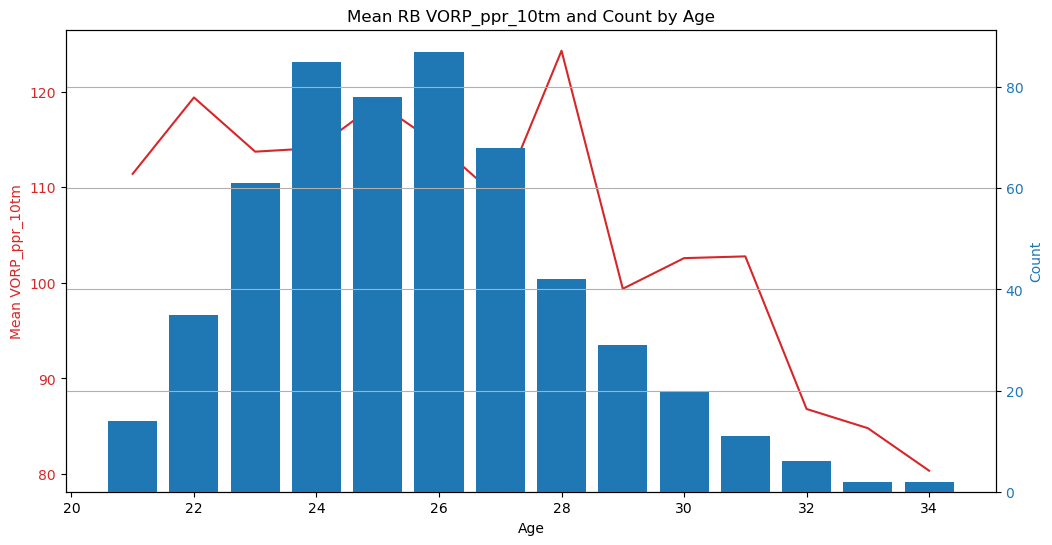

In [116]:
# plot mean VORP over Age (top 10)
plot_mean_and_counts(top_10, x='Age', y='VORP_ppr_10tm')

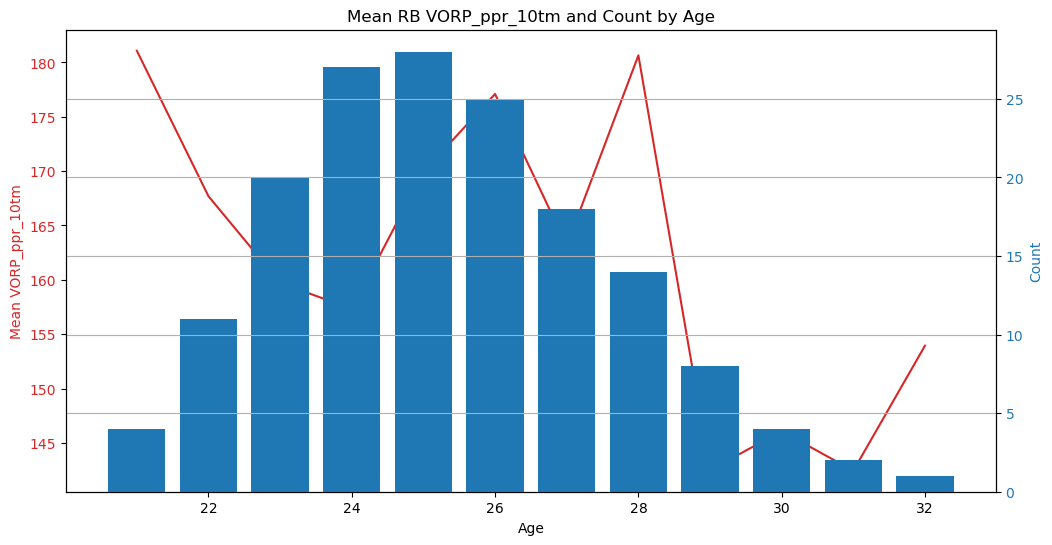

In [117]:
# plot mean VORP over Age (top 3)
plot_mean_and_counts(top_3, x='Age', y='VORP_ppr_10tm')

- In the top 25, rookie RBs who enter the league young (21) and finish with positive VORP are the highest scoring group. However, this sample is small.
- __Most top-performing fantasy RBs go into their season between the ages of 22-28 years old.__
- __Prime seems to be 22-28__, After 28, there is a steep decline.

## Experience

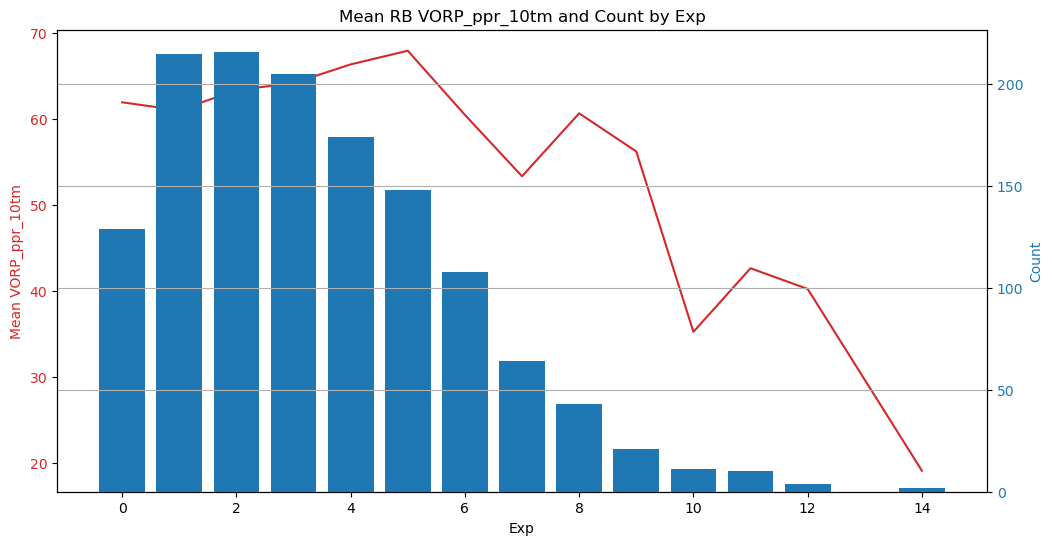

In [78]:
# plot mean VORP over Exp (top 25)
plot_mean_and_counts(top_25, x='Exp', y='VORP_ppr_10tm')

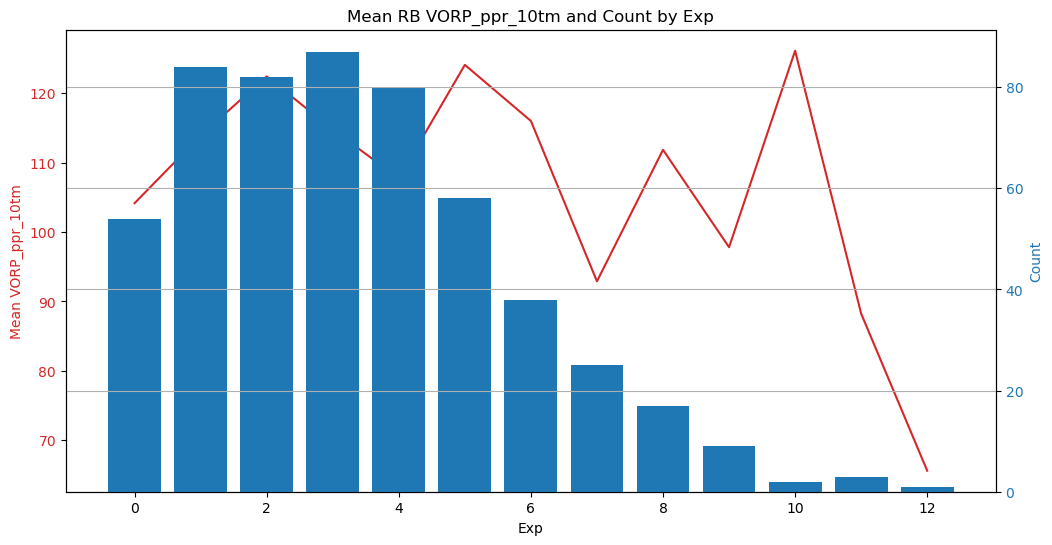

In [79]:
# plot mean VORP over Exp (top 10)
plot_mean_and_counts(top_10, x='Exp', y='VORP_ppr_10tm')

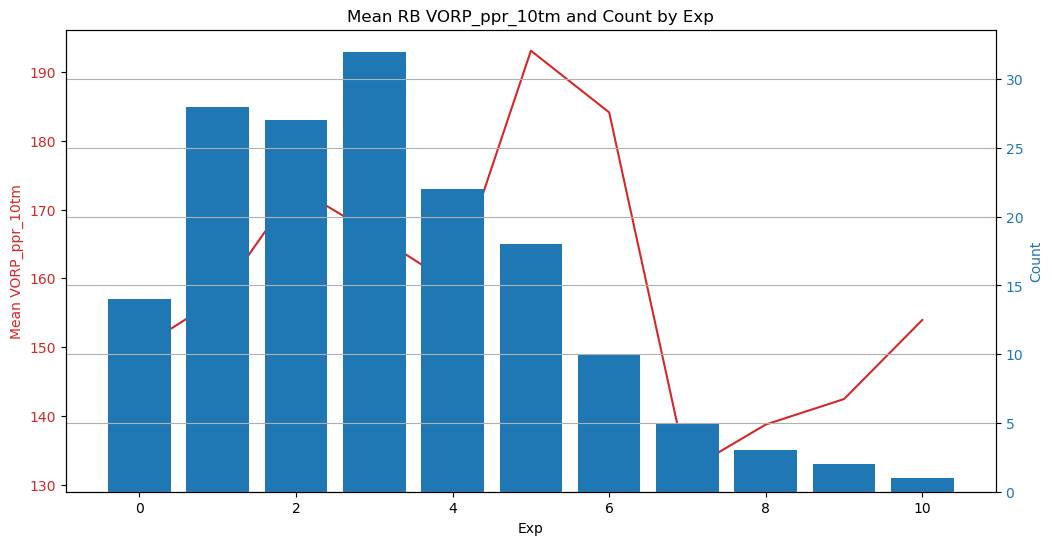

In [118]:
# plot mean VORP over Exp (top 3)
plot_mean_and_counts(top_3, x='Exp', y='VORP_ppr_10tm')

- Looking at Experience is slightly different. In both subsets, we see that __RBs generally tend to have their best years in their first 6 seasons, then there's a sharp drop off.__
- It's likely that 22 and 23 y/o rookies are slightly pulling down the mean VORP  that we saw from 21 y/o rookies. This is just a testament to some of the great rookie RBs to have phenomenal fantasy seasons.
- In the top 10 subset, there are a few outlier RBs in their 11th season (Exp=10).

## Volume

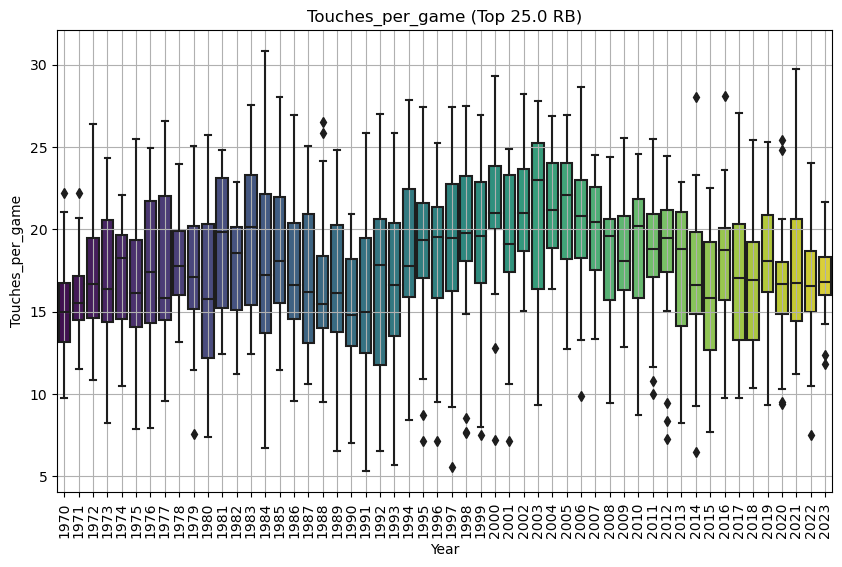

In [81]:
# boxplot of Touches (top 25)
plot_ranks_boxplot(top_25, 'Touches_per_game')

In [83]:
# describe 'Touches_per_game' for top 25
top_25['Touches_per_game'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Touches_per_game,1350.0,17.984364,4.555984,5.3125,14.848901,18.080128,21.196875,30.8125


- The majority of top 25 RBs receive 15-20 touches per game. 

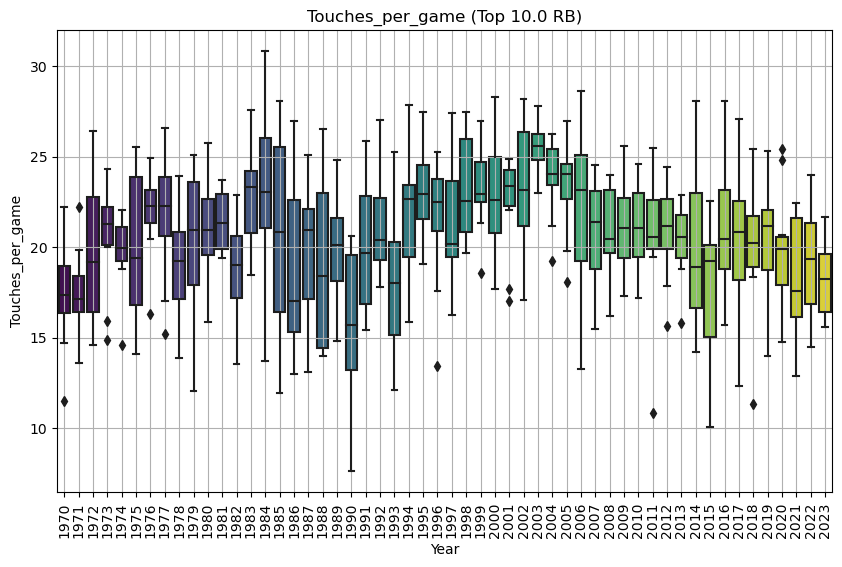

In [82]:
# boxplot of Touches (top 10)
plot_ranks_boxplot(top_10, 'Touches_per_game')

In [84]:
# describe 'Touches_per_game' for top 10
top_10['Touches_per_game'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Touches_per_game,540.0,20.650007,3.787761,7.625,18.114583,20.861905,23.3125,30.8125


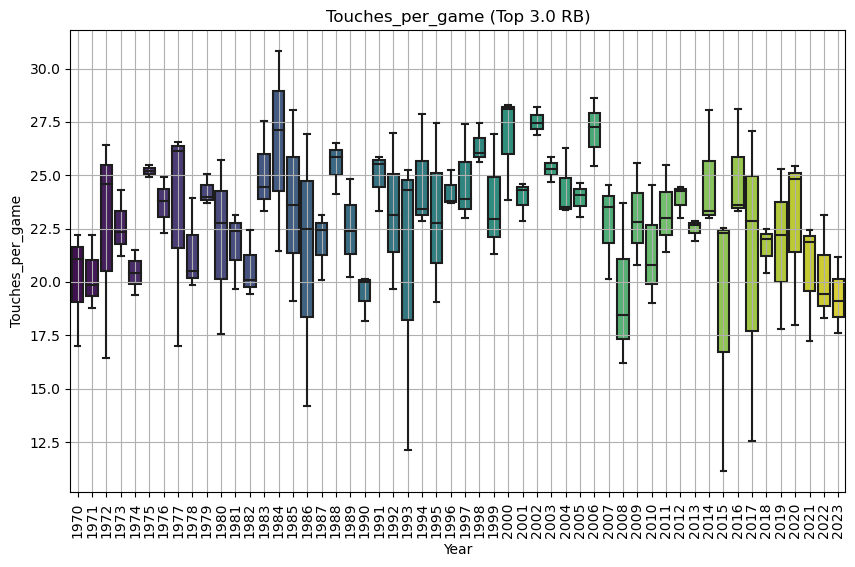

In [119]:
# boxplot of Touches (top 3)
plot_ranks_boxplot(top_3, 'Touches_per_game')

In [120]:
# describe 'Touches_per_game' for top 3
top_3['Touches_per_game'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Touches_per_game,162.0,22.966998,3.340531,11.125,21.194196,23.222917,25.25,30.8125


In [121]:
# calculate the percent of top 3 RBs who had at least 20 touches per game
print(f"Percent of top 3 RBs who had at least 20 touches per game: {round(top_3[top_3['Touches_per_game'] >= 15].shape[0] / top_3.shape[0] * 100, 2)}%")

Percent of top 3 RBs who had at least 20 touches per game: 97.53%


- __To finish as a top 3 fantasy RB, you basically need 20+ touches per game.__

In [123]:
# look at the season with 85 touches
top_3[top_3['Touches_per_game'] == top_3['Touches_per_game'].min()][metadata_cols + stats_cols + ppr_cols]

,Player,Year,Age,Exp,games_played_pct,games_started_pct,Cmp%,Catch%,Pass_Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_Y/A,Rush_TD,Rec_Tgt,Rec_Rec,Rec_Yds,Rec_Y/R,Rec_TD,Fmb,FmbLost,Scrim_Yds,Scrim_TD,Pass_Y/A,Touches,Pass_Cmp_per_game,Pass_Att_per_game,Pass_Yds_per_game,Pass_TD_per_game,Pass_Int_per_game,Rush_Att_per_game,Rush_Yds_per_game,Rush_TD_per_game,Rec_Tgt_per_game,Rec_Rec_per_game,Rec_Yds_per_game,Rec_TD_per_game,Fmb_per_game,FmbLost_per_game,Scrim_Yds_per_game,Scrim_TD_per_game,Touches_per_game,VORP_ppr_10tm,Points_ppr,PPG_ppr,PPT_ppr,SeasonOvrRank_ppr,SeasonPosRank_ppr,PPGOvrRank_ppr,PPGPosRank_ppr,PPTOvrRank_ppr,PPTPosRank_ppr,SeasonTarget_ppr,PPGTarget_ppr
137,Danny Woodhead,2015,30,6,1.0,0.125,0.0,0.754717,0,0,0,0,0,98,336,3.428571,3,106.0,80,755,9.4375,6,0.0,0.0,1091,9,0.0,178,0.0,0.0,0.0,0.0,0.0,6.125,21.0,0.1875,6.625,5.0,47.1875,0.375,0.0,0.0,68.1875,0.5625,11.125,81.7,243.1,15.19375,1.36573,38.0,3.0,59.0,10.0,320.0,30.0,27.1,13.55


In [5]:
# describe total 'Touches'
top_25['Touches'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Touches,1350.0,265.784444,74.116192,85.0,212.0,263.0,318.0,493.0


It's incredible that there was a season where a player only had 85 total touches and still finished in the top 25.

In [28]:
# look at the season with 85 touches
top_25[top_25['Touches'] == top_25['Touches'].min()][metadata_cols + stats_cols + ppr_cols]

,Player,Year,Age,Exp,games_played_pct,games_started_pct,Cmp%,Catch%,Pass_Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_Y/A,Rush_TD,Rec_Tgt,Rec_Rec,Rec_Yds,Rec_Y/R,Rec_TD,Fmb,FmbLost,Scrim_Yds,Scrim_TD,Pass_Y/A,Touches,Pass_Cmp_per_game,Pass_Att_per_game,Pass_Yds_per_game,Pass_TD_per_game,Pass_Int_per_game,Rush_Att_per_game,Rush_Yds_per_game,Rush_TD_per_game,Rec_Tgt_per_game,Rec_Rec_per_game,Rec_Yds_per_game,Rec_TD_per_game,Fmb_per_game,FmbLost_per_game,Scrim_Yds_per_game,Scrim_TD_per_game,Touches_per_game,VORP_ppr_10tm,Points_ppr,PPG_ppr,PPT_ppr,SeasonOvrRank_ppr,SeasonPosRank_ppr,PPGOvrRank_ppr,PPGPosRank_ppr,PPTOvrRank_ppr,PPTPosRank_ppr,SeasonTarget_ppr,PPGTarget_ppr
10191,Leroy Hoard,1991,23,1,1.0,0.5625,0.0,0.589308,0,0,0,0,0,37,154,4.162162,2,81.451418,48,567,11.8125,9,1.0,0.55,721,11,0.0,85,0.0,0.0,0.0,0.0,0.0,2.3125,9.625,0.125,5.090714,3.0,35.4375,0.5625,0.0625,0.034375,45.0625,0.6875,5.3125,45.0,185.0,11.5625,2.176471,41.0,11.0,50.0,13.0,174.0,4.0,83.3,5.20625


Leroy Hoard was a bruising power running back known for his ability to gain tough yards, particularly in short-yardage and goal-line situations. He was able to finish as the 13th ranked RB in 1991 with only __85 touches__. He had more receptions than rushing attempts and scored 11 total TDs on only 700 scrimmage yards. His __PPT (points per touch) of 2.17__, which is the highest ever recorded for a top 25 RB seasonal finish. Let's look at his PPT over his whole career:

In [30]:
# Leroy Hoard PPT
df[df['Player'] == 'Leroy Hoard'][metadata_cols + stats_cols + ppr_cols]

,Player,Year,Age,Exp,games_played_pct,games_started_pct,Cmp%,Catch%,Pass_Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_Y/A,Rush_TD,Rec_Tgt,Rec_Rec,Rec_Yds,Rec_Y/R,Rec_TD,Fmb,FmbLost,Scrim_Yds,Scrim_TD,Pass_Y/A,Touches,Pass_Cmp_per_game,Pass_Att_per_game,Pass_Yds_per_game,Pass_TD_per_game,Pass_Int_per_game,Rush_Att_per_game,Rush_Yds_per_game,Rush_TD_per_game,Rec_Tgt_per_game,Rec_Rec_per_game,Rec_Yds_per_game,Rec_TD_per_game,Fmb_per_game,FmbLost_per_game,Scrim_Yds_per_game,Scrim_TD_per_game,Touches_per_game,VORP_ppr_10tm,Points_ppr,PPG_ppr,PPT_ppr,SeasonOvrRank_ppr,SeasonPosRank_ppr,PPGOvrRank_ppr,PPGPosRank_ppr,PPTOvrRank_ppr,PPTPosRank_ppr,SeasonTarget_ppr,PPGTarget_ppr
9764,Leroy Hoard,1990,22,0,0.8750,0.357143,0.0,0.575928,0,0,0,0,0,58,149,2.568966,3,17.363293,10,73,7.300000,0,6.0,3.30,222,3,0.0,68,0.0,0.0000,0.0,0.0,0.0,4.142857,10.642857,0.214286,1.240235,0.714286,5.214286,0.0000,0.428571,0.235714,15.857143,0.214286,4.857143,-100.7,43.6,3.114286,0.641176,232.0,83.0,252.0,88.0,307.0,96.0,185.0,11.562500
10191,Leroy Hoard,1991,23,1,1.0000,0.562500,0.0,0.589308,0,0,0,0,0,37,154,4.162162,2,81.451418,48,567,11.812500,9,1.0,0.55,721,11,0.0,85,0.0,0.0000,0.0,0.0,0.0,2.312500,9.625000,0.125000,5.090714,3.000000,35.437500,0.5625,0.062500,0.034375,45.062500,0.687500,5.312500,45.0,185.0,11.562500,2.176471,41.0,11.0,50.0,13.0,174.0,4.0,83.3,5.206250
10811,Leroy Hoard,1992,24,2,1.0000,0.562500,0.0,0.541667,0,0,0,0,0,54,236,4.370370,0,48.000000,26,310,11.923077,1,3.0,1.65,546,1,0.0,80,0.0,0.0000,0.0,0.0,0.0,3.375000,14.750000,0.000000,3.000000,1.625000,19.375000,0.0625,0.187500,0.103125,34.125000,0.062500,5.000000,-57.4,83.3,5.206250,1.041250,156.0,56.0,195.0,62.0,260.0,38.0,88.4,5.525000
11302,Leroy Hoard,1993,25,3,1.0000,0.437500,0.0,0.507246,0,1,0,0,0,56,227,4.053571,0,69.000000,35,351,10.028571,0,4.0,2.20,578,0,0.0,92,0.0,0.0625,0.0,0.0,0.0,3.500000,14.187500,0.000000,4.312500,2.187500,21.937500,0.0000,0.250000,0.137500,36.125000,0.000000,5.750000,-62.1,88.4,5.525000,0.960870,154.0,55.0,191.0,66.0,261.0,39.0,222.5,13.906250
11624,Leroy Hoard,1994,26,4,1.0000,0.750000,0.0,0.661765,0,0,0,0,0,209,890,4.258373,5,68.000000,45,445,9.888889,4,8.0,5.00,1335,9,0.0,254,0.0,0.0000,0.0,0.0,0.0,13.062500,55.625000,0.312500,4.250000,2.812500,27.812500,0.2500,0.500000,0.312500,83.437500,0.562500,15.875000,55.2,222.5,13.906250,0.875984,25.0,9.0,33.0,12.0,271.0,57.0,72.0,6.000000
12320,Leroy Hoard,1995,27,5,0.7500,1.000000,0.0,0.812500,0,0,0,0,0,136,547,4.022059,0,16.000000,13,103,7.923077,0,5.0,3.00,650,0,0.0,149,0.0,0.0000,0.0,0.0,0.0,11.333333,45.583333,0.000000,1.333333,1.083333,8.583333,0.0000,0.416667,0.250000,54.166667,0.000000,12.416667,-94.0,72.0,6.000000,0.483221,194.0,60.0,186.0,51.0,365.0,120.0,87.5,7.954545
12820,Leroy Hoard,1996,28,6,0.6875,0.636364,0.0,0.687500,0,0,0,0,0,125,492,3.936000,3,16.000000,11,133,12.090909,0,3.0,2.00,625,3,0.0,136,0.0,0.0000,0.0,0.0,0.0,11.363636,44.727273,0.272727,1.454545,1.000000,12.090909,0.0000,0.272727,0.181818,56.818182,0.272727,12.363636,-65.4,87.5,7.954545,0.643382,163.0,47.0,140.0,38.0,339.0,91.0,66.9,5.575000
13380,Leroy Hoard,1997,29,7,0.7500,0.083333,0.0,0.733333,0,0,0,0,0,80,235,2.937500,4,15.000000,11,84,7.636364,0,0.0,0.00,319,4,0.0,91,0.0,0.0000,0.0,0.0,0.0,6.666667,19.583333,0.333333,1.250000,0.916667,7.000000,0.0000,0.000000,0.000000,26.583333,0.333333,7.583333,-89.1,66.9,5.575000,0.735165,194.0,62.0,197.0,57.0,320.0,77.0,149.7,9.356250
13720,Leroy Hoard,1998,30,8,1.0000,0.062500,0.0,0.846154,0,0,0,0,0,115,479,4.165217,9,26.000000,22,198,9.000000,1,1.0,0.00,677,10,0.0,137,0.0,0.0000,0.0,0.0,0.0,7.187500,29.937500,0.562500,1.625000,1.375000,12.375000,0.0625,0.062500,0.000000,42.312500,0.625000,8.562500,0.5,149.7,9.356250,1.092701,87.0,24.0,118.0,34.0,288.0,49.0,143.1,9.540000
14229,Leroy Hoard,1999,31,9,0.9375,0.200000,0.0,0.850000,0,0,0,0,0,138,555,4.021739,10,20.000000,17,166,9.764706,0,4.0,3.00,721,10,0.0,155,0.0,0.0000,0.0,0.0,0.0,9.200000,37.000000,0.666667,1.333333,1.1

Hoard was never able to come close to replicating the 2+ points per touch, but did post 4 other extremely efficient seasons (with PPT above 0.9).

### Rushing Touches

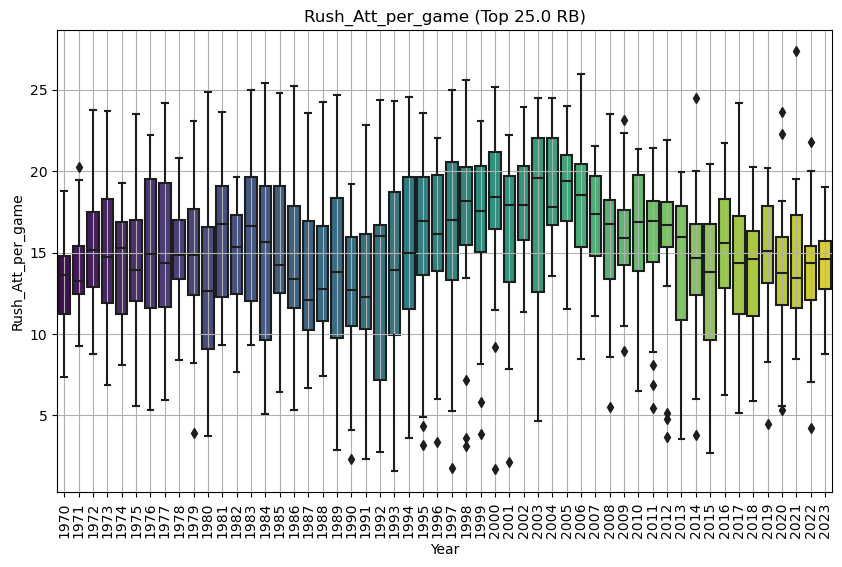

In [128]:
# boxplot of rush att (top 25)
plot_ranks_boxplot(top_25, 'Rush_Att_per_game')

In [129]:
# describe 'Rush_Att_per_game' for top 25
top_25['Rush_Att_per_game'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Rush_Att_per_game,1350.0,15.212464,4.725572,1.5625,12.127083,15.5625,18.622596,27.375


- The majority of top 25 PPR RBs receive around 15 rush att per game. 

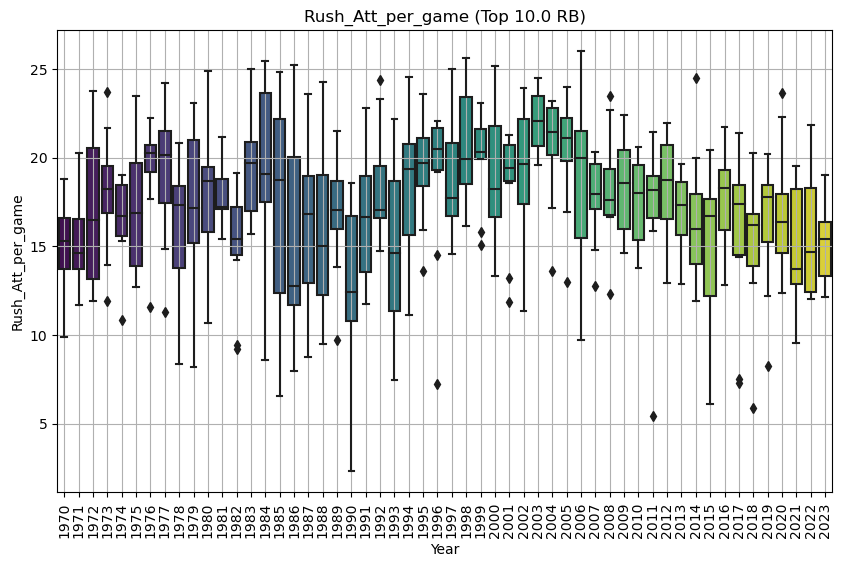

In [130]:
# boxplot of Rush_Att_per_game (top 10)
plot_ranks_boxplot(top_10, 'Rush_Att_per_game')

In [131]:
# describe 'Rush_Att_per_game' for top 10
top_10['Rush_Att_per_game'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Rush_Att_per_game,540.0,17.457193,4.043531,2.3125,14.984375,17.771242,20.292411,26.0


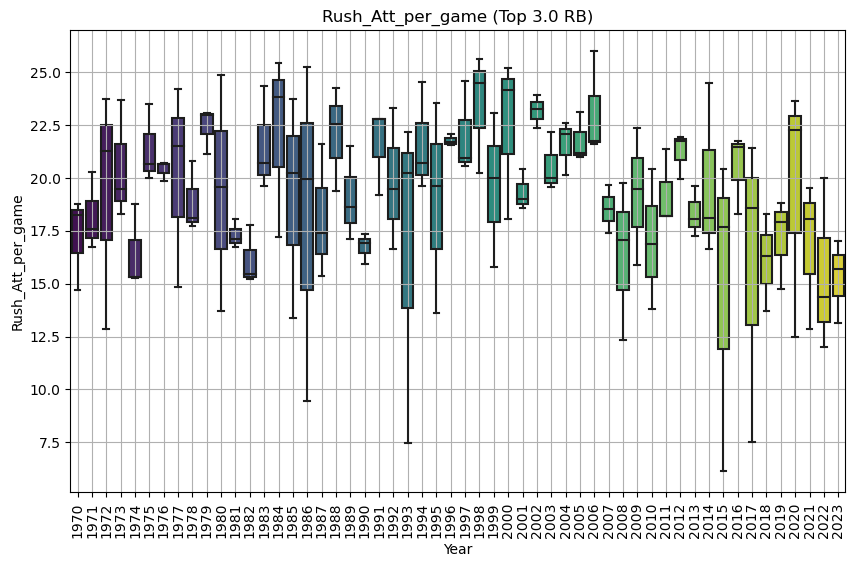

In [132]:
# boxplot of Rush_Att_per_game (top 3)
plot_ranks_boxplot(top_3, 'Rush_Att_per_game')

In [133]:
# describe 'Touches_per_game' for top 3
top_3['Rush_Att_per_game'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Rush_Att_per_game,162.0,19.32352,3.700789,6.125,17.283333,19.65625,21.75,26.0


In [134]:
# calculate the percent of top 3 RBs who had at least 15 touches per game
print(f"Percent of top 3 RBs who had at least 15 Rush_Att per game: {round(top_3[top_3['Rush_Att_per_game'] >= 15].shape[0] / top_3.shape[0] * 100, 2)}%")

Percent of top 3 RBs who had at least 15 Rush_Att per game: 88.27%


### Receiving Touches

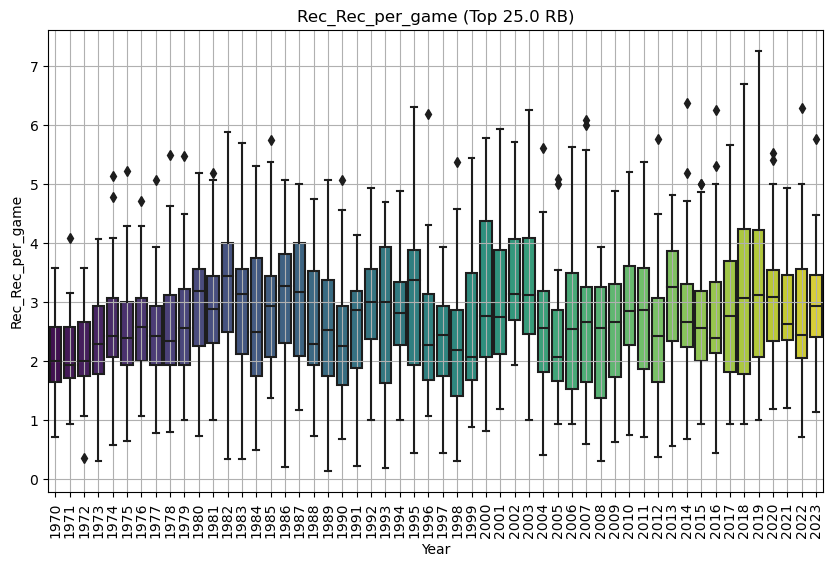

In [135]:
# boxplot of Rec_Rec_per_game (top 25)
plot_ranks_boxplot(top_25, 'Rec_Rec_per_game')

In [136]:
# describe 'Rec_Rec_per_game' for top 25
top_25['Rec_Rec_per_game'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Rec_Rec_per_game,1350.0,2.750512,1.190556,0.133333,1.86875,2.633929,3.466667,7.25


- The majority of top 25 PPR RBs averaged around 2-4 receptions per game. 

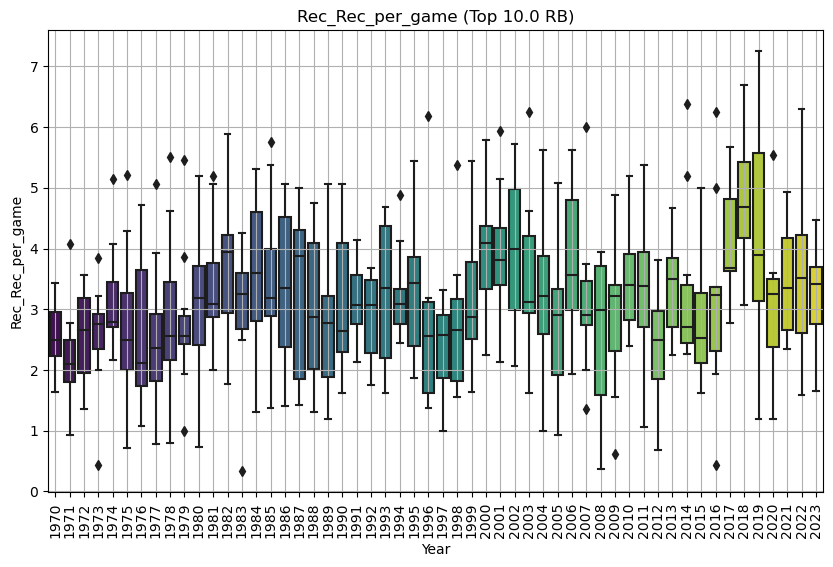

In [137]:
# boxplot of Rec_Rec_per_game (top 10)
plot_ranks_boxplot(top_10, 'Rec_Rec_per_game')

In [138]:
# describe 'Rec_Rec_per_game' for top 10
top_10['Rec_Rec_per_game'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Rec_Rec_per_game,540.0,3.165779,1.217961,0.333333,2.3125,3.0625,3.875,7.25


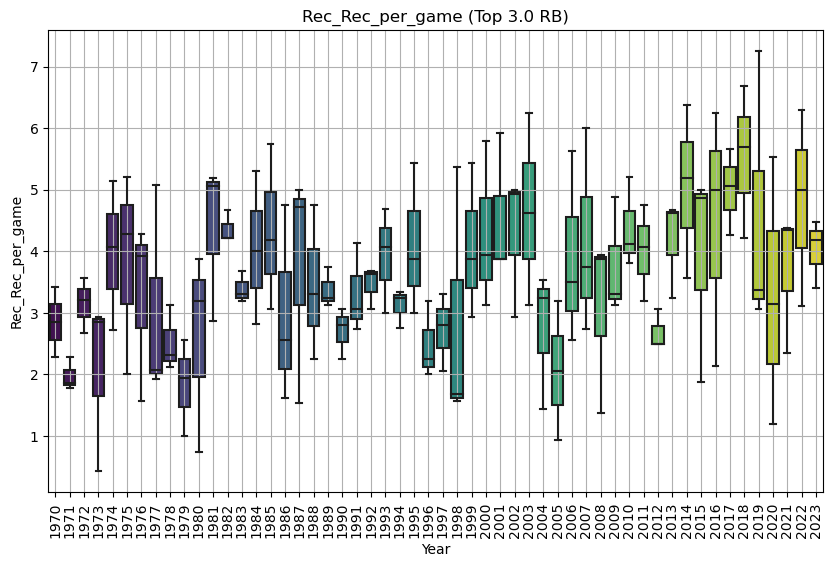

In [139]:
# boxplot of Rec_Rec_per_game (top 3)
plot_ranks_boxplot(top_3, 'Rec_Rec_per_game')

In [140]:
# describe 'Rec_Rec_per_game' for top 3
top_3['Rec_Rec_per_game'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Rec_Rec_per_game,162.0,3.610959,1.331454,0.428571,2.7625,3.393382,4.65625,7.25


In [145]:
# calculate the percent of top 3 RBs who had at least 2 receptions per game
print(f"Percent of top 3 RBs who had at least 2 Receptions per game: {round(top_3[top_3['Rec_Rec_per_game'] >= 2].shape[0] / top_3.shape[0] * 100, 2)}%")

Percent of top 3 RBs who had at least 3 Receptions per game: 89.51%


## Efficiency

In [31]:
# describe 'PPT_ppr'
top_25['PPT_ppr'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
PPT_ppr,1350.0,0.853769,0.199988,0.480422,0.723374,0.814434,0.942413,2.176471


PPT has a median and mean of around 0.8. Any values above this indicate an efficient season. As we saw above, Hoard was a great power back, known for breaking tackles. Thus, he was very effective in goal line scenarios, leading to high TDs. __High goal line usage (TD opportunities) will lead to a high PPT__.

In [32]:
# look at high PPT seasons (above 1 PPT) where TDs are low (2 or less)
top_25[(top_25['PPT_ppr'] >= 1) & ((top_25['Rush_TD'] + top_25['Rec_TD'])<= 2)][metadata_cols + stats_cols + ppr_cols]

,Player,Year,Age,Exp,games_played_pct,games_started_pct,Cmp%,Catch%,Pass_Cmp,Pass_Att,Pass_Yds,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_Y/A,Rush_TD,Rec_Tgt,Rec_Rec,Rec_Yds,Rec_Y/R,Rec_TD,Fmb,FmbLost,Scrim_Yds,Scrim_TD,Pass_Y/A,Touches,Pass_Cmp_per_game,Pass_Att_per_game,Pass_Yds_per_game,Pass_TD_per_game,Pass_Int_per_game,Rush_Att_per_game,Rush_Yds_per_game,Rush_TD_per_game,Rec_Tgt_per_game,Rec_Rec_per_game,Rec_Yds_per_game,Rec_TD_per_game,Fmb_per_game,FmbLost_per_game,Scrim_Yds_per_game,Scrim_TD_per_game,Touches_per_game,VORP_ppr_10tm,Points_ppr,PPG_ppr,PPT_ppr,SeasonOvrRank_ppr,SeasonPosRank_ppr,PPGOvrRank_ppr,PPGPosRank_ppr,PPTOvrRank_ppr,PPTPosRank_ppr,SeasonTarget_ppr,PPGTarget_ppr
9160,Tom Rathman,1989,27,3,1.0000,1.000000,0.0,0.573718,0,0,0,0,0,79,305,3.860759,1,127.240152,73,616,8.438356,1,1.0,0.55,921,2,0.0,152,0.0,0.0,0.0,0.0,0.0,4.937500,19.062500,0.0625,7.952510,4.562500,38.5000,0.062500,0.0625,0.034375,57.562500,0.125000,9.5000,35.4,176.0,11.00000,1.157895,52.0,17.0,68.0,21.0,254.0,33.0,152.3,9.51875
9232,Keith Woodside,1989,25,1,1.0000,1.000000,0.0,0.573718,0,0,0,0,0,46,273,5.934783,1,102.837931,59,527,8.932203,0,4.0,2.20,800,1,0.0,105,0.0,0.0,0.0,0.0,0.0,2.875000,17.062500,0.0625,6.427371,3.687500,32.9375,0.000000,0.2500,0.137500,50.000000,0.062500,6.5625,0.0,140.6,8.78750,1.339048,81.0,25.0,108.0,32.0,242.0,24.0,64.4,4.02500
9640,Ronnie Harmon,1990,26,4,1.0000,0.125000,0.0,0.575928,0,0,0,0,0,66,363,5.500000,0,79.871147,46,511,11.108696,2,1.0,0.55,874,2,0.0,112,0.0,0.0,0.0,0.0,0.0,4.125000,22.687500,0.0000,4.991947,2.875000,31.9375,0.125000,0.0625,0.034375,54.625000,0.125000,7.0000,0.0,144.3,9.01875,1.288393,86.0,25.0,103.0,31.0,228.0,22.0,178.7,11.16875
10108,Ronnie Harmon,1991,27,5,1.0000,0.000000,0.0,0.589308,0,0,0,0,0,89,544,6.112360,1,100.117368,59,555,9.406780,1,2.0,1.10,1099,2,0.0,148,0.0,0.0,0.0,0.0,0.0,5.562500,34.000000,0.0625,6.257336,3.687500,34.6875,0.062500,0.1250,0.068750,68.687500,0.125000,9.2500,38.7,178.7,11.16875,1.207432,46.0,13.0,59.0,17.0,239.0,20.0,213.5,13.34375
10585,Bobby Humphrey,1992,26,3,1.0000,0.062500,0.0,0.720000,0,0,0,0,0,102,471,4.617647,1,75.000000,54,507,9.388889,1,2.0,1.10,978,2,0.0,156,0.0,0.0,0.0,0.0,0.0,6.375000,29.437500,0.0625,4.687500,3.375000,31.6875,0.062500,0.1250,0.068750,61.125000,0.125000,9.7500,20.9,161.6,10.10000,1.035897,52.0,20.0,69.0,22.0,261.0,39.0,NaN,NaN
11125,Ronnie Harmon,1993,29,7,1.0000,0.062500,0.0,0.708738,0,0,0,0,0,46,216,4.695652,0,103.000000,73,671,9.191781,2,0.0,0.00,887,2,0.0,119,0.0,0.0,0.0,0.0,0.0,2.875000,13.500000,0.0000,6.437500,4.562500,41.9375,0.125000,0.0000,0.000000,55.437500,0.125000,7.4375,23.2,173.7,10.85625,1.459664,49.0,18.0,68.0,24.0,229.0,14.0,140.9,8.80625
13179,Kimble Anders,1997,31,6,0.9375,0.933333,0.0,0.819444,0,0,0,0,0,79,397,5.025316,0,72.000000,59,453,7.677966,2,3.0,0.00,850,2,0.0,138,0.0,0.0,0.0,0.0,0.0,5.266667,26.466667,0.0000,4.800000,3.933333,30.2000,0.133333,0.2000,0.000000,56.666667,0.133333,9.2000,0.0,156.0,10.40000,1.130435,84.0,25.0,98.0,30.0,279.0,41.0,149.2,9.32500
14265,Tiki Barber,1999,24,2,1.0000,0.062500,0.0,0.725275,0,0,0,0,0,62,258,4.161290,0,91.000000,66,609,9.227273,2,5.0,0.00,867,2,0.0,128,0.0,0.0,0.0,0.0,0.0,3.875000,16.125000,0.0000,5.687500,4.125000,38.0625,0.125000,0.3125,0.000000,54.187500,0.125000,8.0000,13.4,164.7,10.29375,1.286719,78.0,21.0,107.0,27.0,287.0,40.0,290.5,18.15625
14807,Richie Anderson,2000,29,7,1.0000,0.625000,0.0,0.704000,0,0,0,0,0,27,63,2.333333,0,125.000000,88,853,9.693182,2,2.0,2.00,916,2,0.0,115,0.0,0.0,0.0,0.0,0.0,1.687500,3.937500,0.0000,7.812500,5.500000,53.3125,0.125000,0.1250,0.125000,57.250000,0.125000,7.1875,0.0,187.6,11.72500,1.631304,62.0,25.0,79.0,29.0,253.0,22.0,85.4,5.33750


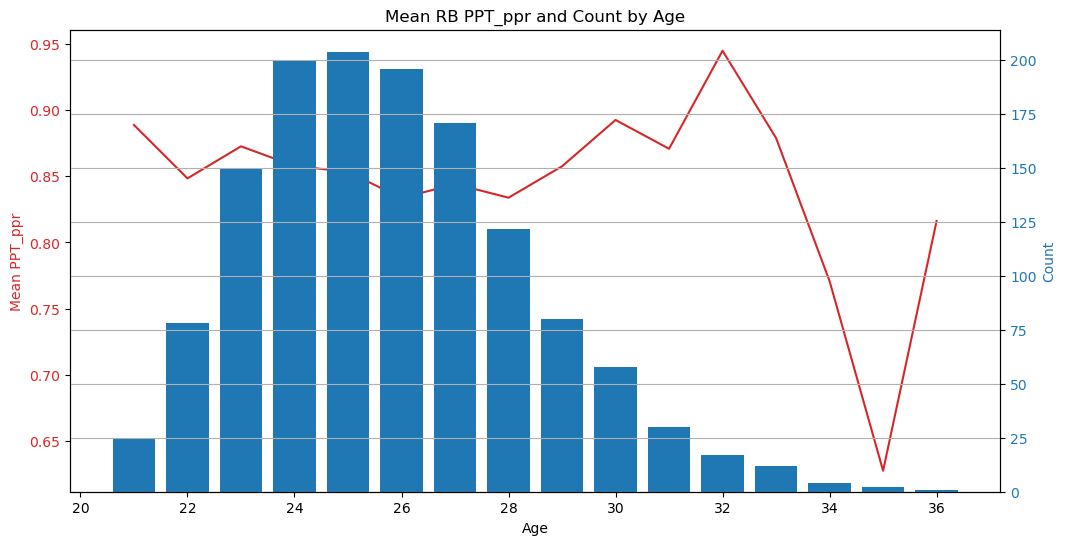

In [5]:
# plot mean PPT over Age
plot_mean_and_counts(top_25, x='Age', y='PPT_ppr')

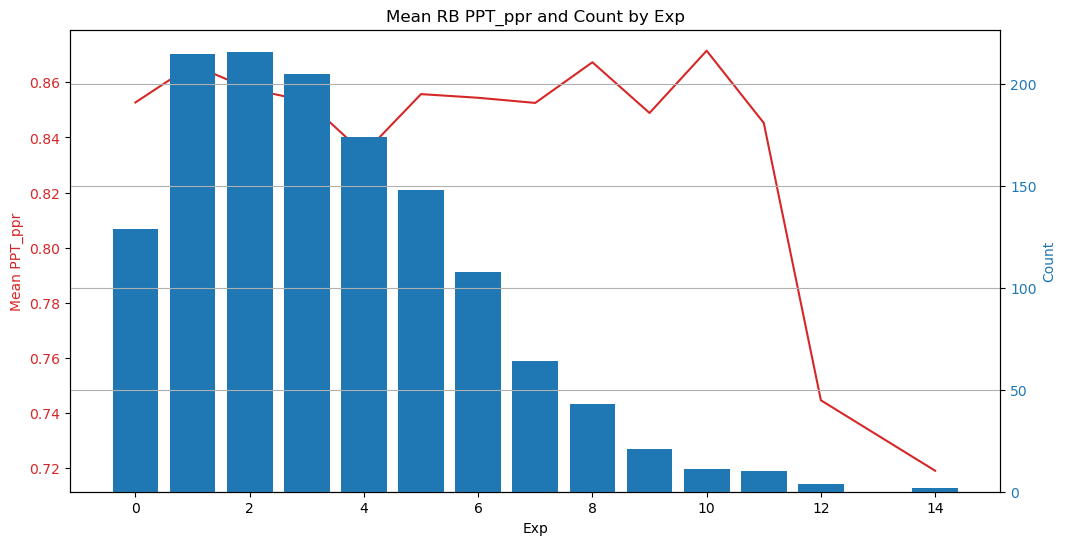

In [6]:
# plot mean PPT over Exp
plot_mean_and_counts(top_25, x='Exp', y='PPT_ppr')

It's hard to discern anything from either visual. PPT seems to be consitent for RBs until their 10th season (over the age of 30), in which it then steeply declines.

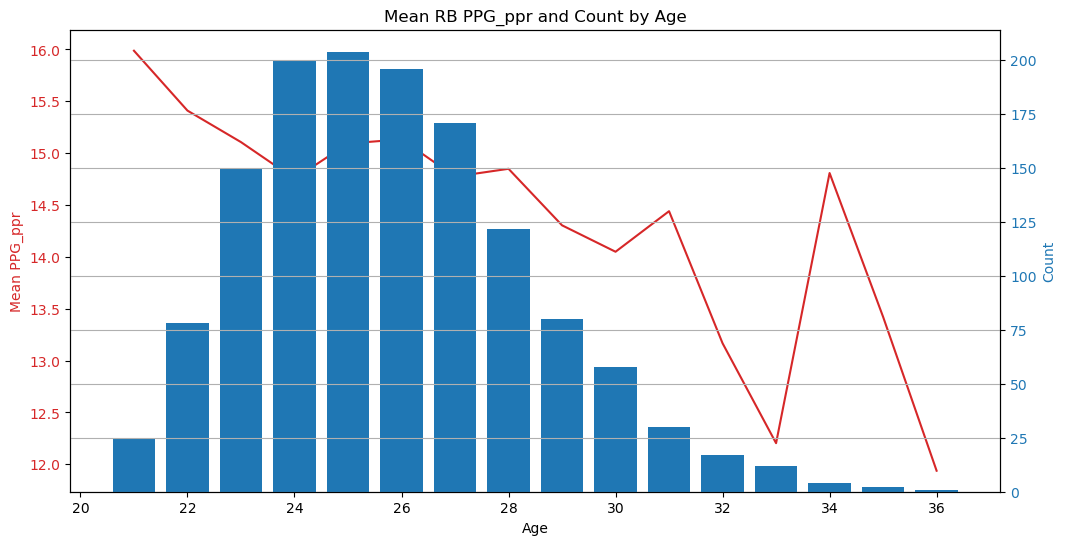

In [7]:
# plot mean PPG over Age
plot_mean_and_counts(top_25, x='Age', y='PPG_ppr')

- For the young (under 24 y/o) RBs that do make it into the top 25, they do average 15+ PPG as a group. This slightly declines from 21-24.
- PPG seems to sharply decline after age 28 season.

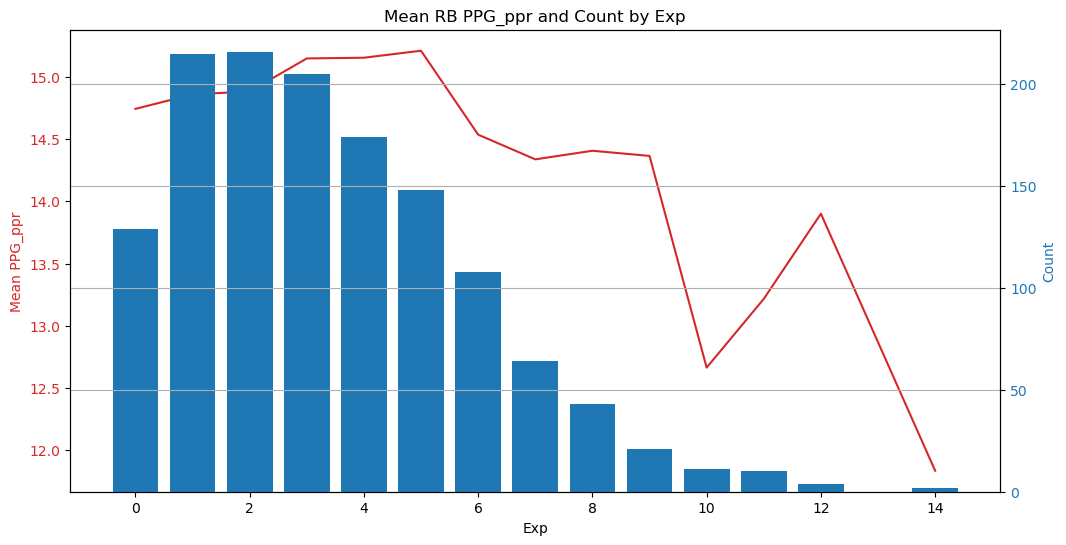

In [8]:
# plot mean PPG over Exp
plot_mean_and_counts(top_25, x='Exp', y='PPG_ppr')

PPG steadily increases in the beginning of an RB's career, then sharply declines after their 6th season.

## Rookies
How often are top 25 RBs in their rookie season?

In [63]:
# get rookies
rookies_25 = top_25[top_25.Exp == 0]
rookies_10 = top_10[top_10.Exp == 0]

print(f'{rookies_25.shape[0]/top_25.shape[0]:.2%} of top 25 RBs are rookies.')
print(f'{rookies_10.shape[0]/top_10.shape[0]:.2%} of top 10 RBs are rookies.')

9.56% of top 25 RBs are rookies.
10.00% of top 10 RBs are rookies.


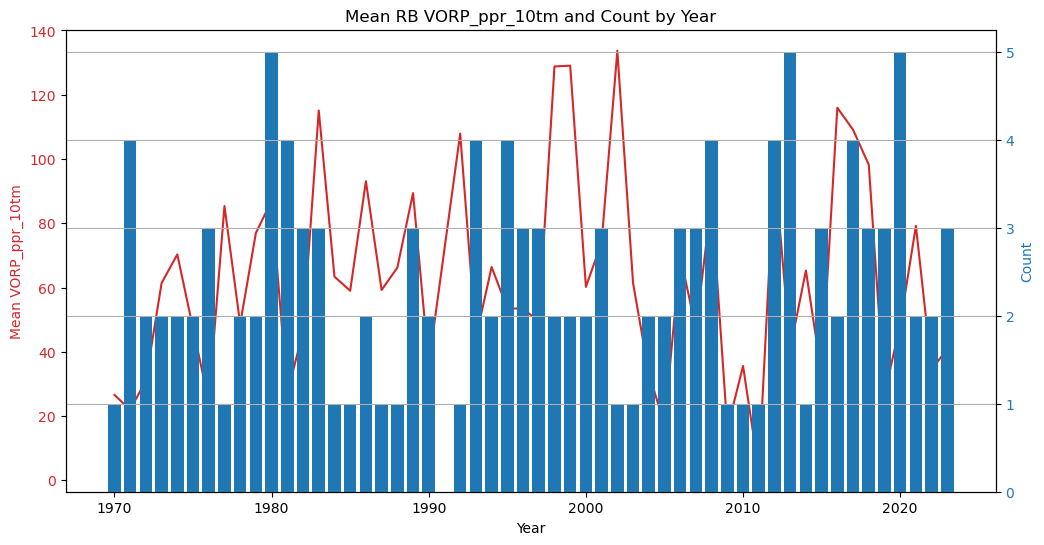

In [11]:
# plot rookies by Year
plot_mean_and_counts(rookies, x='Year', y='VORP_ppr_10tm')

- On average, about 3 rookie RBs finish as a top 25 RB per season.
- There has only been one season (1991) where a rookie did not finish in the top 25 RBs.
- The mean VORP is quite eratic, ranging from 20 to 140 points above replacement level. This may be due to the quality of RBs coming into the league that given season.

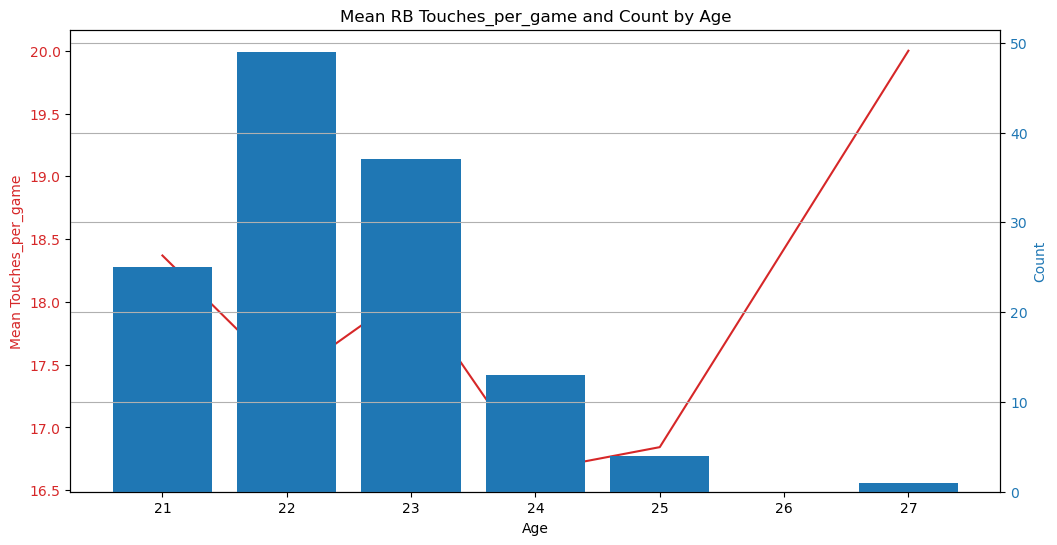

In [36]:
# plot mean Touches over Age
plot_mean_and_counts(rookies, x='Age', y='Touches_per_game')

- Top 25 rookies are fed around 18 touches per game.

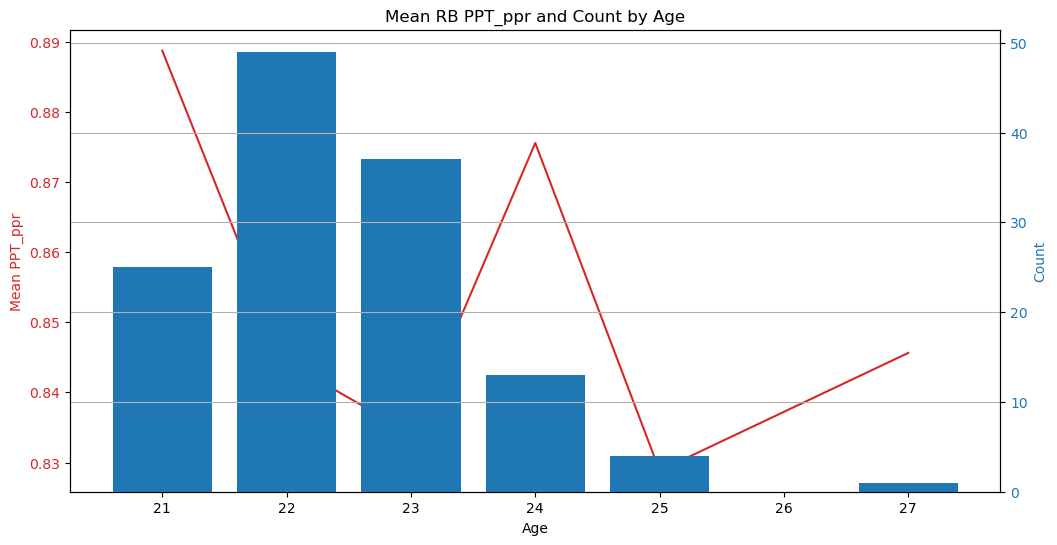

In [16]:
# plot mean PPT over Age
plot_mean_and_counts(rookies, x='Age', y='PPT_ppr')

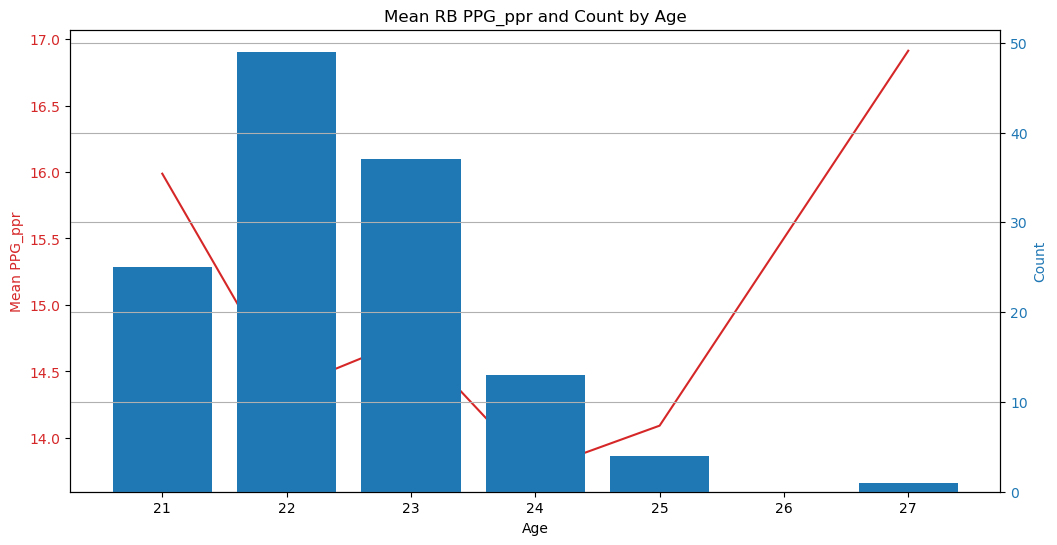

In [17]:
# plot mean PPG over Age
plot_mean_and_counts(rookies, x='Age', y='PPG_ppr')

- Generally speaking, younger rookie RBs (age 21) who finish in the top 25 are more efficient than older rookie RBs.

## Team Swap
How often are top 25 RBs in their first season with a new team?

In [62]:
# get players on new teams
new_team_25 = top_25[top_25.New_Team == 1]
new_team_10 = top_10[top_10.New_Team == 1]

print(f'{new_team_25.shape[0]/top_25.shape[0]:.2%} of top 25 RBs are in their first season on a new team.')
print(f'{new_team_10.shape[0]/top_10.shape[0]:.2%} of top 10 RBs are in their first season on a new team.')

9.11% of top 25 RBs are in their first season on a new team.
7.78% of top 10 RBs are in their first season on a new team.


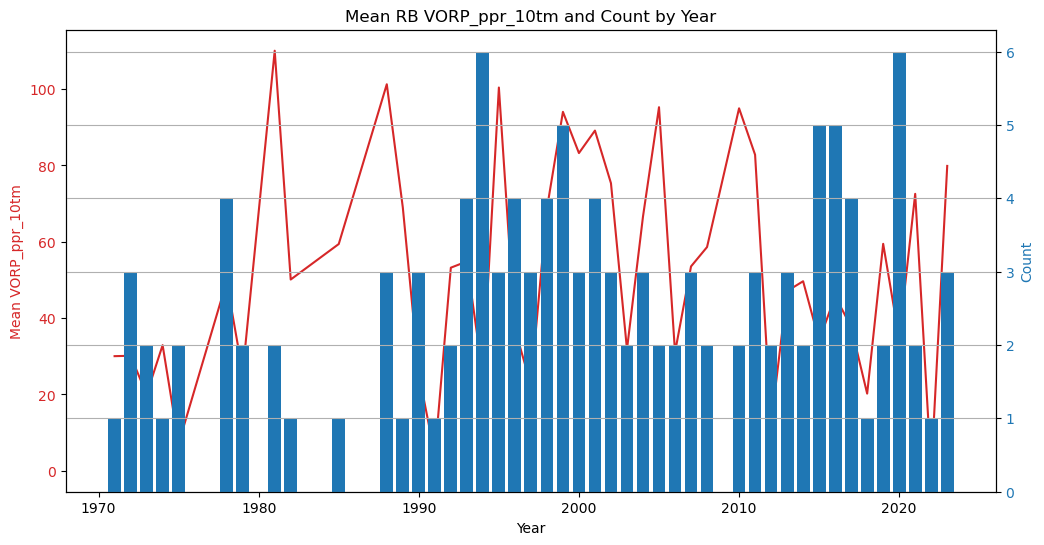

In [59]:
# plot new_team by Year
plot_mean_and_counts(new_team_25, x='Year', y='VORP_ppr_10tm')

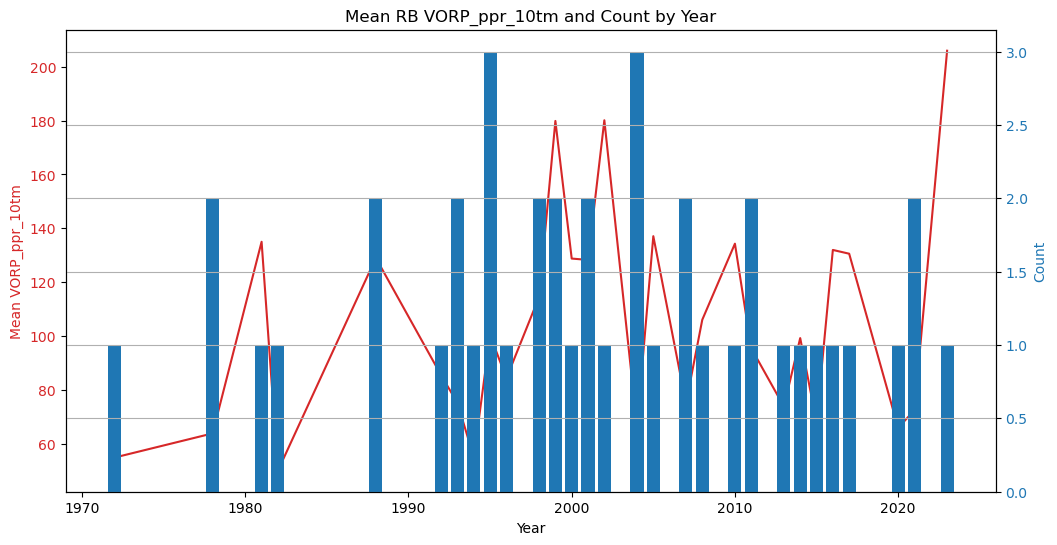

In [60]:
# plot new_team by Year
plot_mean_and_counts(new_team_10, x='Year', y='VORP_ppr_10tm')

- In the 70s and 80s, top performances by new-team RBs were much less common. In this era, it was more common for RBs to spend their entire careers with the same team.
- Since 2010, about 3 new-team RBs finish as a top 25 RB per season.
- There have been 9/54 seasons (17%) where a new-team RB did not finish in the top 25 RBs.
- The mean VORP is quite eratic, ranging from 10 to 140 points above replacement level.

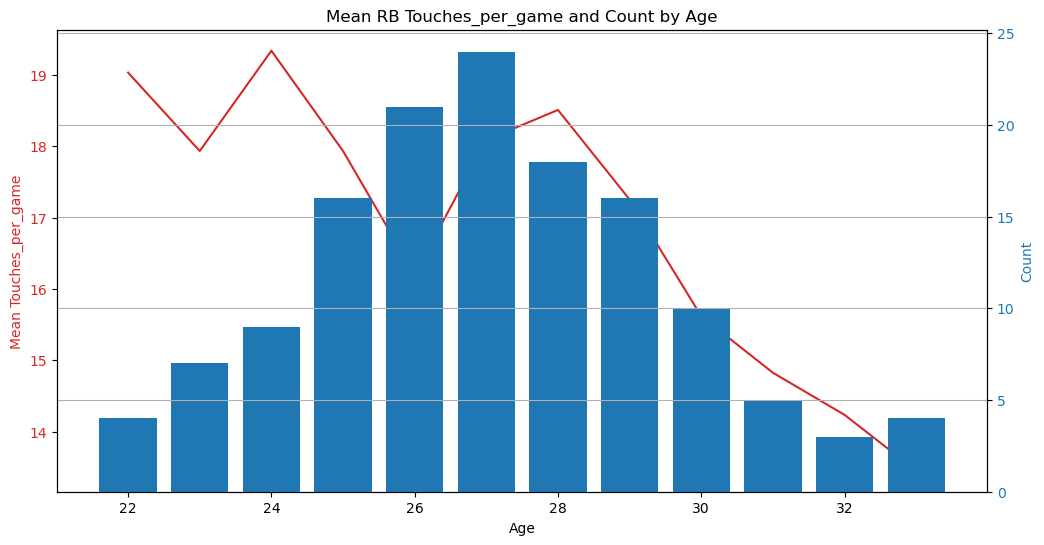

In [43]:
# plot mean Touches over Age
plot_mean_and_counts(new_team, x='Age', y='Touches_per_game')

- On average, top-25 new-team RBs enter their first season with the new team when they are 26 or 27 y/o.
- Top 25 new-team RBs who are 24 or yuonger are fed around 19 touches per game.

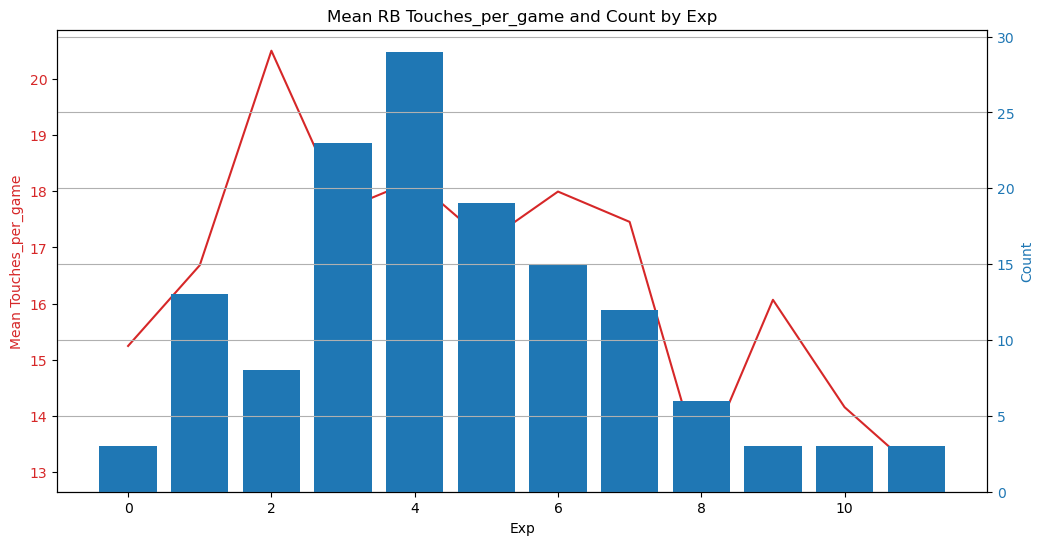

In [44]:
# plot mean Touches over Exp
plot_mean_and_counts(new_team, x='Exp', y='Touches_per_game')

- On average, top-25 new-team RBs enter their first season with the new team when they are entering their 4th or 5th season.

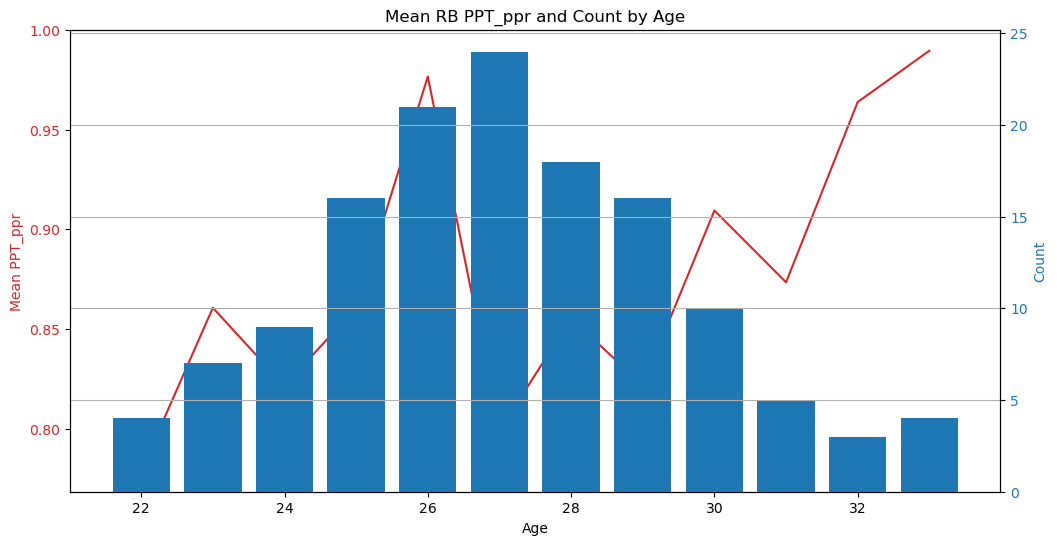

In [45]:
# plot mean PPT over Age
plot_mean_and_counts(new_team, x='Age', y='PPT_ppr')

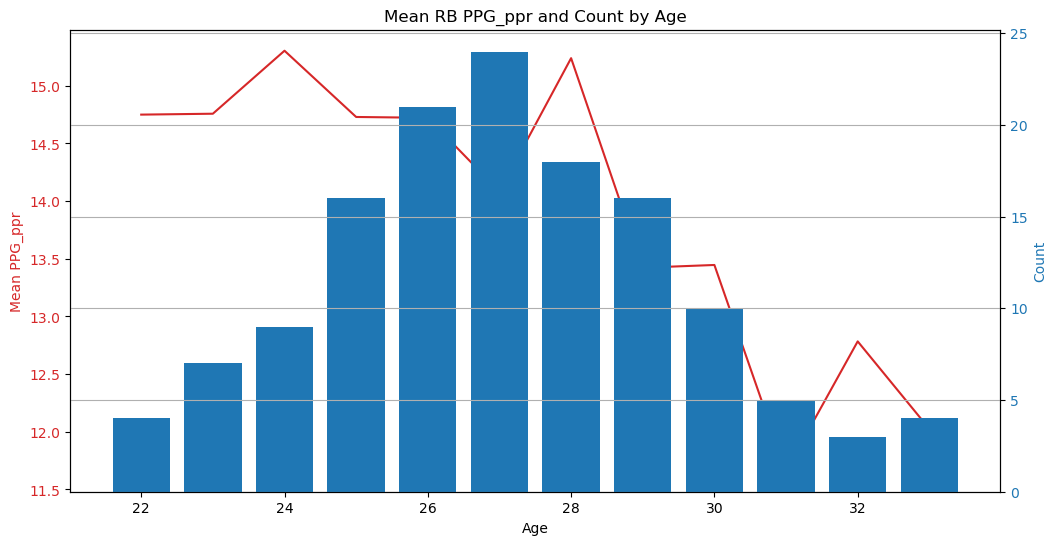

In [46]:
# plot mean PPT over Age
plot_mean_and_counts(new_team, x='Age', y='PPG_ppr')

## Correlation
Now, we'll look at all stats to see how they correlate with the next year's fantasy performance.

In [84]:
# drop null targets
corr_df = top_25.dropna(subset=['SeasonTarget_ppr'])

In [85]:
# get correlation with Season Target
corr = corr_df[stats_cols + flag_cols + ppr_cols].corr()[['SeasonTarget_ppr']].sort_values(by='SeasonTarget_ppr', ascending=False).T

,SeasonTarget_ppr,PPGTarget_ppr,PPG_ppr,Scrim_Yds_per_game,VORP_ppr_10tm,Points_ppr,Scrim_Yds,Touches_per_game,Rush_Yds_per_game,Touches,Rush_Yds,Rush_Att_per_game,Rush_Att,ProBowl,Scrim_TD,Scrim_TD_per_game,Rush_TD,Rec_Rec_per_game,Rush_TD_per_game,Rec_Rec,Rec_Yds_per_game,Rec_Yds,Rush_Y/A,AllPro,Rec_Tgt,Rec_Tgt_per_game,Catch%,games_started_pct,Pass_Yds,Pass_TD,Pass_TD_per_game,Pass_Yds_per_game,Pass_Cmp,Pass_Cmp_per_game,Pass_Att,Pass_Att_per_game,PPTOvrRank_ppr,Pass_Y/A,Cmp%,Rec_TD,Fmb,FmbLost,Rec_TD_per_game,Fmb_per_game,FmbLost_per_game,PPT_ppr,games_played_pct,Rec_Y/R,Pass_Int,Pass_Int_per_game,PPTPosRank_ppr,Exp,Will_be_on_New_Team,Age,SeasonOvrRank_ppr,PPGOvrRank_ppr,SeasonPosRank_ppr,PPGPosRank_ppr
SeasonTarget_ppr,1.0,0.888488,0.435669,0.431063,0.417183,0.413286,0.404473,0.348921,0.327774,0.325294,0.315428,0.28002,0.267436,0.257772,0.241074,0.230476,0.221158,0.217175,0.213349,0.212924,0.196757,0.195659,0.184893,0.173601,0.157159,0.154176,0.140917,0.137808,0.123167,0.121917,0.119611,0.118772,0.106084,0.104022,0.095792,0.094927,0.090087,0.08893,0.068997,0.063772,0.062604,0.059844,0.057186,0.051494,0.048321,0.039683,0.015642,0.01396,0.007941,0.005718,0.001282,-0.130878,-0.140746,-0.190879,-0.307438,-0.313513,-0.373556,-0.380329


Using the next season's __total__ fantasy points as the target:
- PPG has the strongest correlation (0.44) with the target. Raw points are slightly below this (0.41).
- Scrimmage yds per game (0.43) has the second highest correlation, edging out raw scrimmage yards (0.40).
- Touches per game (0.35) is next, which is also slightly higher than raw touches (0.33).
- Rush yds per game (0.33) and raw rush yds (0.32) are the last coefficients to be larger than 0.3.
- Age and Experience have slight negative correlations (-0.13 and -0.19).
- 'Will_be_on_New_Team' also has a slight negative correlation (-0.14).
- The 'rank' stats obviously have a high negative correlation.

In [87]:
# get correlation with per game Target
corr_df[stats_cols + flag_cols + ppr_cols].corr()[['PPGTarget_ppr']].sort_values(by='PPGTarget_ppr', ascending=False).T

,PPGTarget_ppr,SeasonTarget_ppr,PPG_ppr,Scrim_Yds_per_game,VORP_ppr_10tm,Points_ppr,Scrim_Yds,Touches_per_game,Rush_Yds_per_game,Touches,Rush_Yds,Rush_Att_per_game,Scrim_TD,Scrim_TD_per_game,Rush_Att,ProBowl,Rush_TD,Rec_Rec_per_game,Rec_Yds_per_game,Rush_TD_per_game,Rec_Yds,Rec_Rec,Rush_Y/A,AllPro,Rec_Tgt_per_game,Rec_Tgt,games_started_pct,Catch%,Rec_TD,Rec_TD_per_game,Pass_TD,Pass_TD_per_game,Pass_Yds,Pass_Yds_per_game,Pass_Att,Pass_Att_per_game,Pass_Cmp,Pass_Cmp_per_game,Fmb,Fmb_per_game,FmbLost,Pass_Y/A,FmbLost_per_game,PPT_ppr,PPTOvrRank_ppr,Cmp%,Rec_Y/R,Pass_Int_per_game,Pass_Int,games_played_pct,PPTPosRank_ppr,Exp,Will_be_on_New_Team,Age,SeasonOvrRank_ppr,PPGOvrRank_ppr,SeasonPosRank_ppr,PPGPosRank_ppr
PPGTarget_ppr,1.0,0.888488,0.545527,0.529214,0.512764,0.50789,0.487154,0.408142,0.388006,0.37162,0.365484,0.323246,0.313586,0.307841,0.300885,0.295419,0.271972,0.271419,0.269444,0.267917,0.264897,0.262644,0.229626,0.229045,0.204275,0.203997,0.164169,0.146729,0.123013,0.118558,0.118548,0.118122,0.11044,0.106814,0.106118,0.105515,0.098142,0.097058,0.091978,0.085254,0.084437,0.079867,0.078123,0.074011,0.070898,0.068532,0.067388,0.008344,0.008121,-0.00139,-0.037821,-0.153705,-0.188979,-0.209003,-0.375652,-0.38876,-0.445788,-0.462266


Using the next season's __per-game__ fantasy points as the target:
- PPG has a massive correlation (0.54) with the target.
- Scrimmage yds per game (0.53) has the second highest correlation.
- Touches per game (0.41) is 3rd.
- Rush yds per game (0.39) is 4th.
- Age and Experience have slight negative correlations (-0.15 and -0.21).
- 'Will_be_on_New_Team' also has a slight negative correlation (-0.19).

It seems like all explainable correlations are stronger with the per-game target. In the modeling process, I will try both the season and per-game targets.

## Breakout
Inspect the data to identify any factors that may predict breakout (progressive) seasons.

## Bust
Inspect the data to identify any factors that may predict bust (regressive) seasons.

## Takeaways
-  __Most top-performing fantasy RBs go into their season between the ages of 22-28 years old. After 28, there is a steep decline.__
- __RBs generally tend to have their best years in their first 6 seasons, then there's a sharp drop off.__
- __To finish as a top 3 fantasy RB, you need 20+ touches per game.__